In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [27]:
credit = pd.read_excel('C:/Users/AJ/Documents/Workspace/datasets/default_credit.xls')
credit.rename(columns = {'default payment next month':'DEFAULTERS'}, inplace = True)
credit.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULTERS  
0         0         0         0           1  
1      1000         0      2000           1  
2      1000      1000      5000           0  
3      1100      1069      1000           0  
4      9000       689       679           0  

[5 rows x 25 columns]

In [28]:
'''
0- pay duly
1- delayed for 1 month
2- delayed for 2 months
3- delayed for 3 months
4- delayed for 4 months
5- delayed for 5 months
6- delayed for 6 months
7- delayed for 7 months
8- delayed for 8 months
9- delayed for 9 months
10- delayed for 10 months
'''

credit['PAY_0'] = credit['PAY_0'].replace({0:0, -1:1, -2:2, 1:3, 2:4, 3:5, 4:6, 5:7, 6:8, 7:9, 8:10})
credit['PAY_2'] = credit['PAY_2'].replace({0:0, -1:1, -2:2, 1:3, 2:4, 3:5, 4:6, 5:7, 6:8, 7:9, 8:10})
credit['PAY_3'] = credit['PAY_3'].replace({0:0, -1:1, -2:2, 1:3, 2:4, 3:5, 4:6, 5:7, 6:8, 7:9, 8:10})
credit['PAY_4'] = credit['PAY_4'].replace({0:0, -1:1, -2:2, 1:3, 2:4, 3:5, 4:6, 5:7, 6:8, 7:9, 8:10})
credit['PAY_5'] = credit['PAY_5'].replace({0:0, -1:1, -2:2, 1:3, 2:4, 3:5, 4:6, 5:7, 6:8, 7:9, 8:10})
credit['PAY_6'] = credit['PAY_6'].replace({0:0, -1:1, -2:2, 1:3, 2:4, 3:5, 4:6, 5:7, 6:8, 7:9, 8:10})

In [29]:
credit.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      4      4      1      1   
1   2     120000    2          2         2   26      1      4      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57      1      0      1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULTERS  
0         0         0         0           1  
1      1000         0      2000           1  
2      1000      1000      5000           0  
3      1100      1069      1000           0  
4      9000       689       679           0  

[5 rows x 25 columns]

In [103]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          30000 non-null  int64
 1   LIMIT_BAL   30000 non-null  int64
 2   SEX         30000 non-null  int64
 3   EDUCATION   30000 non-null  int64
 4   MARRIAGE    30000 non-null  int64
 5   AGE         30000 non-null  int64
 6   PAY_0       30000 non-null  int64
 7   PAY_2       30000 non-null  int64
 8   PAY_3       30000 non-null  int64
 9   PAY_4       30000 non-null  int64
 10  PAY_5       30000 non-null  int64
 11  PAY_6       30000 non-null  int64
 12  BILL_AMT1   30000 non-null  int64
 13  BILL_AMT2   30000 non-null  int64
 14  BILL_AMT3   30000 non-null  int64
 15  BILL_AMT4   30000 non-null  int64
 16  BILL_AMT5   30000 non-null  int64
 17  BILL_AMT6   30000 non-null  int64
 18  PAY_AMT1    30000 non-null  int64
 19  PAY_AMT2    30000 non-null  int64
 20  PAY_AMT3    30000 non-null  

In [104]:
credit.describe().T

count           mean            std       min       25%  \
ID          30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL   30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX         30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION   30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE    30000.0       1.551867       0.521970       0.0      1.00   
AGE         30000.0      35.485500       9.217904      21.0     28.00   
PAY_0       30000.0       1.184767       1.481790       0.0      0.00   
PAY_2       30000.0       1.069700       1.476070       0.0      0.00   
PAY_3       30000.0       1.055200       1.457632       0.0      0.00   
PAY_4       30000.0       0.972200       1.404811       0.0      0.00   
PAY_5       30000.0       0.907067       1.346832       0.0      0.00   
PAY_6       30000.0       0.949500       1.349992       0.0      0.00   
BILL_AMT1   30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2   30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3   30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4   30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5   30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6   30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1    30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2    30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3    30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4    30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5    30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6    30000.0    5215.502567   17777.465775       0.0    117.75   
DEFAULTERS  30000.0       0.221200       0.415062       0.0      0.00   
CBILL_AMT1  30000.0       0.442567       0.802697       0.0      0.00   
CBILL_AMT2  30000.0       0.847067       0.464993       0.0      1.00   
CBILL_AMT3  30000.0       0.276567       0.532685       0.0      0.00   
CBILL_AMT4  30000.0       0.859200       0.456051       0.0      1.00   
CBILL_AMT5  30000.0       0.271800       0.538084       0.0      0.00   
CBILL_AMT6  30000.0       0.262667       0.530298       0.0      0.00   
CPAY_AMT1   30000.0       1.192067       2.315719       0.0      0.00   
CPAY_AMT2   30000.0       0.783833       1.800985       0.0      0.00   
CPAY_AMT3   30000.0       4.797333       2.433445       0.0      6.00   
CPAY_AMT4   30000.0       1.943400       1.982505       0.0      1.00   
CPAY_AMT5   30000.0       3.226733       1.718398       0.0      4.00   
CPAY_AMT6   30000.0       4.036567       1.971233       0.0      5.00   

                 50%        75%        max  
ID           15000.5   22500.25    30000.0  
LIMIT_BAL   140000.0  240000.00  1000000.0  
SEX              2.0       2.00        2.0  
EDUCATION        2.0       2.00        6.0  
MARRIAGE         2.0       2.00        3.0  
AGE             34.0      41.00       79.0  
PAY_0            1.0       2.00       10.0  
PAY_2            0.0       2.00       10.0  
PAY_3            0.0       2.00       10.0  
PAY_4            0.0       2.00       10.0  
PAY_5            0.0       2.00       10.0  
PAY_6            0.0       2.00       10.0  
BILL_AMT1    22381.5   67091.00   964511.0  
BILL_AMT2    21200.0   64006.25   983931.0  
BILL_AMT3    20088.5   60164.75  1664089.0  
BILL_AMT4    19052.0   54506.00   891586.0  
BILL_AMT5    18104.5   50190.50   927171.0  
BILL_AMT6    17071.0   49198.25   961664.0  
PAY_AMT1      2100.0    5006.00   873552.0  
PAY_AMT2      2009.0    5000.00  1684259.0  
PAY_AMT3      1800.0    4505.00   896040.0  
PAY_AMT4      1500.0    4013.25   621000.0  
PAY_AMT5      1500.0    4031.50   426529.0  
PAY_AMT6      1500.0    4000.00   528666.0  
DEFAULTERS       0.0       0.00        1.0  
CBILL_AMT1       0.0       0.00        2.0  
CBILL_AMT2       1.0    

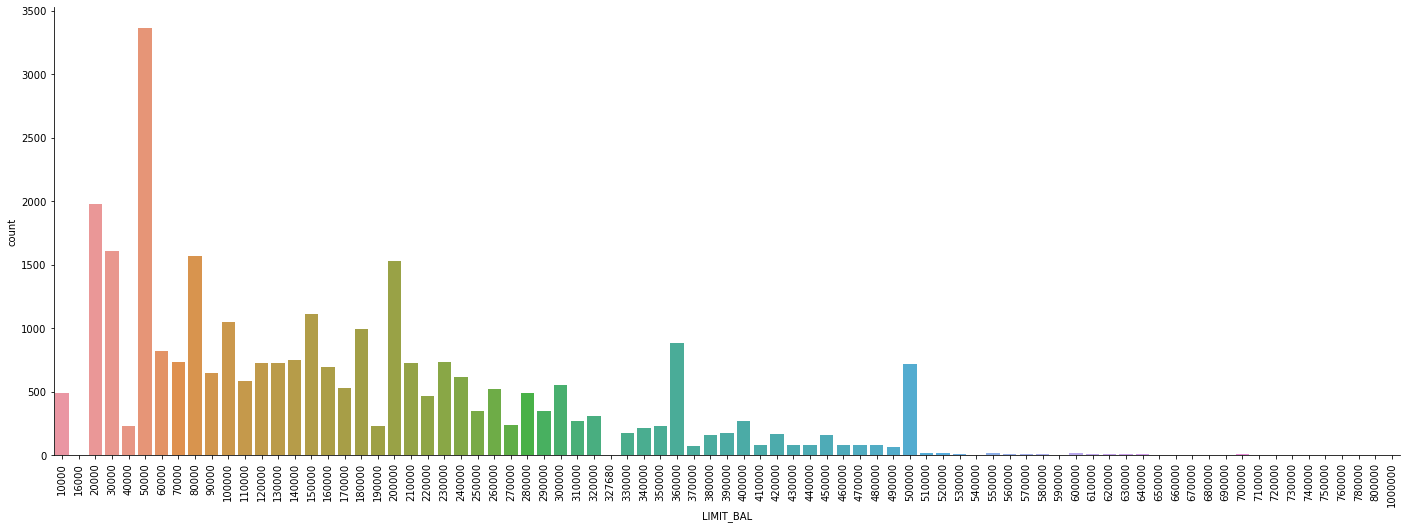

In [7]:
limit = sns.catplot('LIMIT_BAL', data=credit, kind='count', aspect=3)
plt.gcf().set_size_inches(20,7)
limit.set_xticklabels(rotation=90)

Most of the customers using this bank or agency have been given an amount ranging from 10000-500000 in credit. (This includes individual and family/supplimentary credit) 

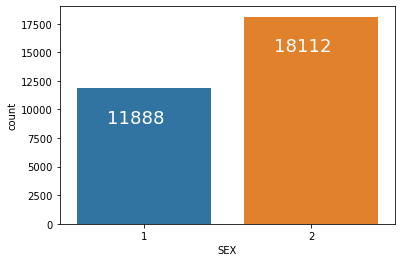

2    60.373333
1    39.626667
Name: SEX, dtype: float64


In [8]:
sex = sns.countplot(x='SEX', data=credit)
for a in sex.patches:
    sex.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='white', size=18)
plt.show()
print(credit['SEX'].value_counts(normalize=True)*100)

Females make up for 60% of credit loans owners with this bank against 40% of Males

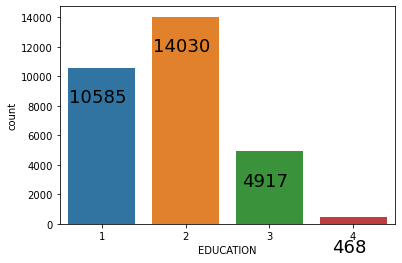

2    46.766667
1    35.283333
3    16.390000
4     1.560000
Name: EDUCATION, dtype: float64


In [69]:
othersE = (credit.EDUCATION==0)|(credit.EDUCATION==5)|(credit.EDUCATION==6)
credit.loc[othersE,'EDUCATION']=4

edu = sns.countplot(x='EDUCATION', data=credit)
for a in edu.patches:
    edu.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=18)
plt.show()
print(credit['EDUCATION'].value_counts(normalize=True)*100)

- Graduate school student make up for 46.7% of credit users with this bank
- University students make up for 35.3% of credit users with this bank 
- while high school students and others make up a combined 18% credit users with this bank

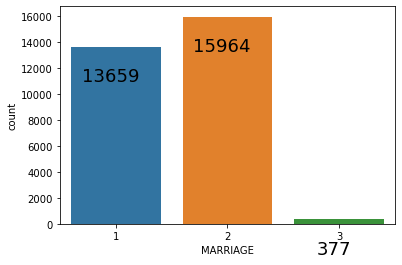

2    53.213333
1    45.530000
3     1.256667
Name: MARRIAGE, dtype: float64


In [72]:
othersM = (credit.MARRIAGE==4)
credit.loc[othersM,'MARRIAGE']=3

marriage = sns.countplot(x='MARRIAGE', data=credit)
for a in marriage.patches:
    marriage.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=18)
plt.show()
print(credit['MARRIAGE'].value_counts(normalize=True)*100)

- Single people make up for 53.2% of the credit users
- Married people make up for 45.5% of the credit users
- While others make up for 1.3% of the credit users

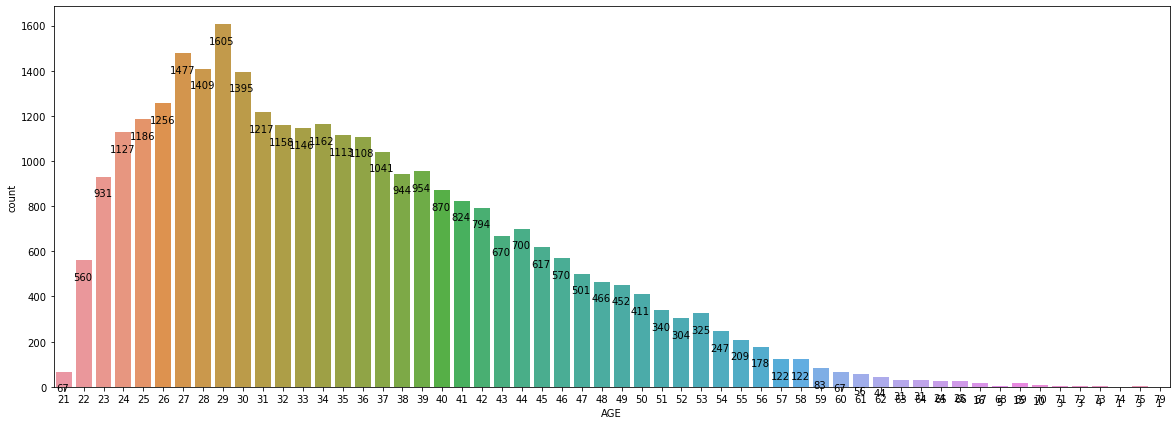

In [94]:
age = sns.countplot(x='AGE', data=credit)
plt.gcf().set_size_inches(20,7)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

Selecting from a count of 200 and above, 94.62% of credit users are from the ages 22-55

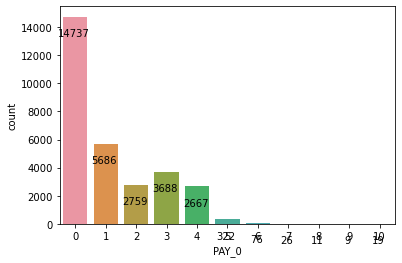

0     49.123333
1     18.953333
3     12.293333
2      9.196667
4      8.890000
5      1.073333
6      0.253333
7      0.086667
10     0.063333
8      0.036667
9      0.030000
Name: PAY_0, dtype: float64


In [105]:
repaySept = sns.countplot(x='PAY_0', data=credit)
for a in repaySept.patches:
    repaySept.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_0'].value_counts(normalize=True)*100)

- 49.12% of credit loan users made payment duly in September 2005
- 18.95% of credit loan users had delayed payment for 1 month in September 2005
- 12.29% of credit loan users had delayed payment for 3 month in September 2005
- 9.20% of credit loan users had delayed payment for 2 month in September 2005
- 8.90% of credit loan users had delayed payment for 4 month in September 2005
- 1.07% of credit loan users had delayed payment for 5 month in September 2005
- 0.25% of credit loan users had delayed payment for 6 month in September 2005
- 0.09% of credit loan users had delayed payment for 7 month in September 2005
- 0.63% of credit loan users had delayed payment for 10 month in September 2005
- 0.04% of credit loan users had delayed payment for 8 month in September 2005
- 0.03% of credit loan users had delayed payment for 9 month in September 2005

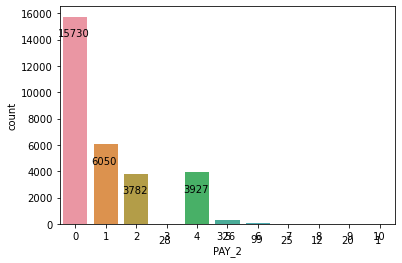

0     52.433333
1     20.166667
4     13.090000
2     12.606667
5      1.086667
6      0.330000
3      0.093333
7      0.083333
9      0.066667
8      0.040000
10     0.003333
Name: PAY_2, dtype: float64


In [106]:
repayAug = sns.countplot(x='PAY_2', data=credit)
for a in repayAug.patches:
    repayAug.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_2'].value_counts(normalize=True)*100)

- 52.43% of credit loan users made payment duly in August 2005
- 20.17% of credit loan users had delayed payment for 1 month in August 2005
- 13.09% of credit loan users had delayed payment for 4 month in August 2005
- 12.61% of credit loan users had delayed payment for 2 month in August 2005
- 1.09% of credit loan users had delayed payment for 5 month in August 2005
- 0.33% of credit loan users had delayed payment for 6 month in August 2005
- 0.09% of credit loan users had delayed payment for 3 month in August 2005
- 0.08% of credit loan users had delayed payment for 7 month in August 2005
- 0.07% of credit loan users had delayed payment for 9 month in August 2005
- 0.04% of credit loan users had delayed payment for 8 month in August 2005
- 0.00% of credit loan users had delayed payment for 10 month in August 2005

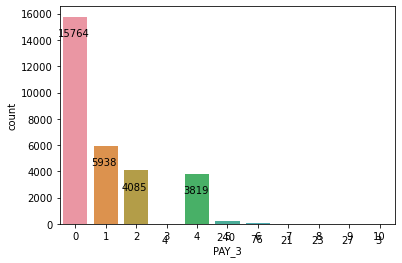

0     52.546667
1     19.793333
2     13.616667
4     12.730000
5      0.800000
6      0.253333
9      0.090000
8      0.076667
7      0.070000
3      0.013333
10     0.010000
Name: PAY_3, dtype: float64


In [107]:
repayJul = sns.countplot(x='PAY_3', data=credit)
for a in repayJul.patches:
    repayJul.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_3'].value_counts(normalize=True)*100)

- 52.55% of credit loan users made payment duly in July 2005
- 19.79% of credit loan users had delayed payment for 1 month in July 2005
- 13.62% of credit loan users had delayed payment for 2 month in July 2005
- 12.73% of credit loan users had delayed payment for 4 month in July 2005
- 0.80% of credit loan users had delayed payment for 5 month in July 2005
- 0.25% of credit loan users had delayed payment for 6 month in July 2005
- 0.09% of credit loan users had delayed payment for 9 month in July 2005
- 0.08% of credit loan users had delayed payment for 8 month in July 2005
- 0.07% of credit loan users had delayed payment for 7 month in July 2005
- 0.01% of credit loan users had delayed payment for 3 month in July 2005
- 0.01% of credit loan users had delayed payment for 10 month in July 2005

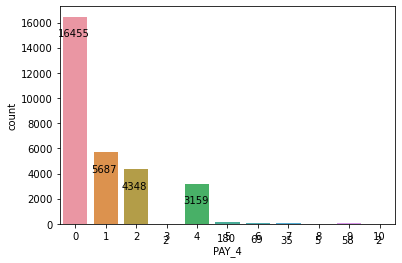

0     54.850000
1     18.956667
2     14.493333
4     10.530000
5      0.600000
6      0.230000
9      0.193333
7      0.116667
8      0.016667
3      0.006667
10     0.006667
Name: PAY_4, dtype: float64


In [108]:
repayJun = sns.countplot(x='PAY_4', data=credit)
for a in repayJun.patches:
    repayJun.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_4'].value_counts(normalize=True)*100)

- 54.85% of credit loan users made payment duly in June 2005
- 18.96% of credit loan users had delayed payment for 1 month in June 2005
- 14.49% of credit loan users had delayed payment for 2 month in June 2005
- 10.53% of credit loan users had delayed payment for 4 month in June 2005
- 0.60% of credit loan users had delayed payment for 5 month in June 2005
- 0.23% of credit loan users had delayed paymenJunet for 6 month in June 2005
- 0.19% of credit loan users had delayed payment for 9 month in June 2005
- 0.12% of credit loan users had delayed payment for 7 month in June 2005
- 0.02% of credit loan users had delayed payment for 8 month in June 2005
- 0.01% of credit loan users had delayed payment for 3 month in June 2005
- 0.01% of credit loan users had delayed payment for 10 month in June 2005

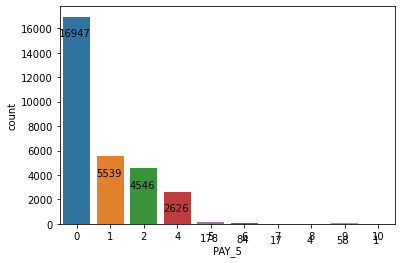

0     56.490000
1     18.463333
2     15.153333
4      8.753333
5      0.593333
6      0.280000
9      0.193333
7      0.056667
8      0.013333
10     0.003333
Name: PAY_5, dtype: float64


In [109]:
repayMay = sns.countplot(x='PAY_5', data=credit)
for a in repayMay.patches:
    repayMay.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_5'].value_counts(normalize=True)*100)

- 56.49% of credit loan users made payment duly in May 2005
- 18.46% of credit loan users had delayed payment for 1 month in May 2005
- 15.15% of credit loan users had delayed payment for 2 month in May 2005
- 8.75% of credit loan users had delayed payment for 4 month in May 2005
- 0.59% of credit loan users had delayed payment for 5 month in May 2005
- 0.28% of credit loan users had delayed payment for 6 month in May 2005
- 0.19% of credit loan users had delayed payment for 9 month in May 2005
- 0.06% of credit loan users had delayed payment for 7 month in May 2005
- 0.01% of credit loan users had delayed payment for 8 month in May 2005
- 0.00% of credit loan users had delayed payment for 10 month in May 2005

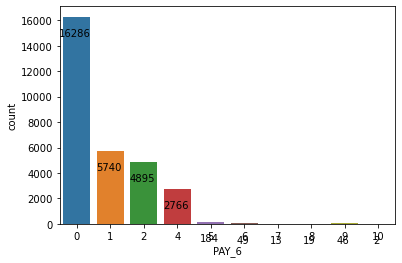

0     54.286667
1     19.133333
2     16.316667
4      9.220000
5      0.613333
6      0.163333
9      0.153333
8      0.063333
7      0.043333
10     0.006667
Name: PAY_6, dtype: float64


In [110]:
repayApr = sns.countplot(x='PAY_6', data=credit)
for a in repayApr.patches:
    repayApr.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['PAY_6'].value_counts(normalize=True)*100)

- 54.29% of credit loan users made payment duly in April 2005
- 19.13% of credit loan users had delayed payment for 1 month in April 2005
- 16.32% of credit loan users had delayed payment for 2 month in April 2005
- 9.22% of credit loan users had delayed payment for 4 month in April 2005
- 0.61% of credit loan users had delayed payment for 5 month in April 2005
- 0.16% of credit loan users had delayed payment for 6 month in April 2005
- 0.15% of credit loan users had delayed payment for 9 month in April 2005
- 0.06% of credit loan users had delayed payment for 8 month in April 2005
- 0.04% of credit loan users had delayed payment for 7 month in April 2005
- 0.01% of credit loan users had delayed payment for 10 month in April 2005

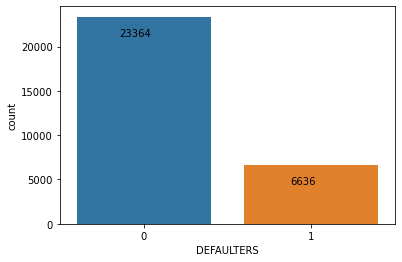

0    77.88
1    22.12
Name: DEFAULTERS, dtype: float64


In [79]:
repaySept = sns.countplot(x='DEFAULTERS', data=credit)
for a in repaySept.patches:
    repaySept.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(credit['DEFAULTERS'].value_counts(normalize=True)*100)

- 77.9% of credit loan users do not default on thier payments
- 22.1% of credit loan users default on thier payments

Organising all the 'Bill Statement' and 'Amount of previous payment' features in clusters to make them easy to analyze

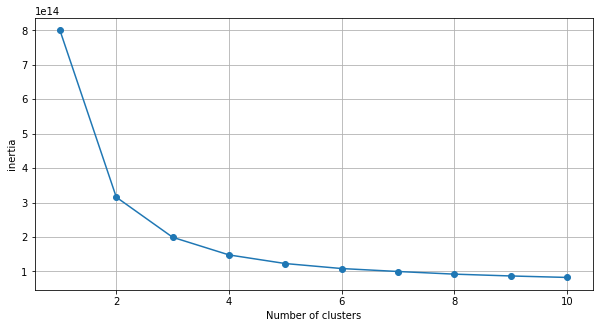

In [43]:
# creating a function to work out the optimum number of clusters

def optKMeans(dat, maxK):
    means = []
    inertias = []
    
    for k in range(1, maxK):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(dat)
        
        means.append(k)
        inertias.append(kmeans.inertia_)

    #generating the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()

# identifying the cluster that works best for the bill statement columns
optKMeans(credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], 11)

the inertia begins to drop to a more stable region from 3 clusters, so let us work with 3 clusters

In [26]:
# applying k means clustering so we can analyze each feature 

km = KMeans(n_clusters=3, init= 'k-means++', max_iter=300, n_init=10, random_state=0)

<AxesSubplot:ylabel='count'>

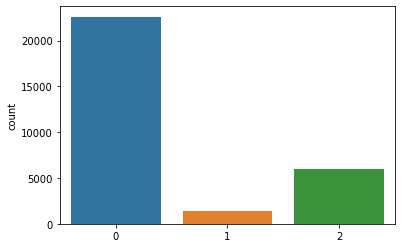

In [34]:
bSept = km.fit_predict(credit[['BILL_AMT1']])
sns.countplot(x=bSept, data=credit)

In [45]:
# organising the a_energy and their clusters in a table to understand the plot properly
septTable = pd.DataFrame(bSept, credit['BILL_AMT1'])
septTable = septTable.rename(columns={'BILL_AMT1' : 'BILL_AMT1', 0 : 'clusters'})

# to see the min and max range for each cluster
show = septTable[septTable['clusters']==2]
show.sort_values(by='BILL_AMT1', ascending=True)

clusters
BILL_AMT1          
68321             2
68328             2
68329             2
68370             2
68371             2
...             ...
207406            2
207571            2
207592            2
207593            2
207627            2

[6011 rows x 1 columns]

- 22,613 (75.62%) of credit loan users have a bill statement ranging from -165,580 to 68,288 in September 2005
- 6,011 (19.88%) of credit loan users have a bill statement ranging from 68,321 to 207,627 in September 2005
- 1,376 (4.50%) of credit loan users have a bill statement ranging from 207,966 to 964,511 in September 2005

<AxesSubplot:ylabel='count'>

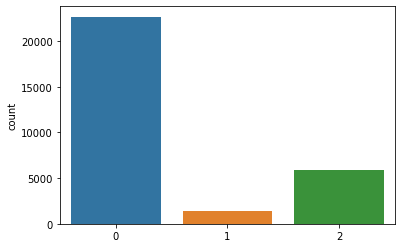

In [47]:
bAug = km.fit_predict(credit[['BILL_AMT2']])
sns.countplot(x=bAug, data=credit)

In [52]:
augTable = pd.DataFrame(bAug, credit['BILL_AMT2'])
augTable = augTable.rename(columns={'BILL_AMT2':'BILL_AMT2', 0:'clusters'})

show = augTable[augTable['clusters']==2]
show.sort_values(by='BILL_AMT2', ascending=True)

clusters
BILL_AMT2          
65605             2
65631             2
65667             2
65668             2
65674             2
...             ...
199262            2
199338            2
199344            2
199367            2
199379            2

[5932 rows x 1 columns]

- 22,663 (76.04%) of credit loan users have a bill statement ranging from -69,777 to 65,585 in August 2005
- 5,932 (19.63%) of credit loan users have a bill statement ranging from 65,605 to 199,379 in August 2005
- 1,405 (4.33%) of credit loan users have a bill statement ranging from 199,451 to 983,931 in August 2005

<AxesSubplot:ylabel='count'>

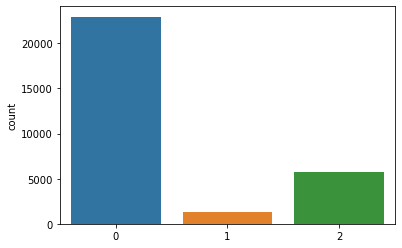

In [57]:
bJul = km.fit_predict(credit[['BILL_AMT3']])
sns.countplot(x=bJul, data=credit)

In [61]:
julTable = pd.DataFrame(bJul, credit['BILL_AMT3'])
julTable = julTable.rename(columns={'BILL_AMT3':'BILL_AMT3', 0:'clusters'})

show = julTable[julTable['clusters']==2]
show.sort_values(by='BILL_AMT3', ascending=True)

clusters
BILL_AMT3          
65119             2
65132             2
65169             2
65169             2
65181             2
...             ...
198983            2
199223            2
199348            2
199360            2
199393            2

[5781 rows x 1 columns]

- 22,951 (76.53%) of credit loan users have a bill statement ranging from -157,264 to 65,068 in July 2005
- 5,781 (19.29%) of credit loan users have a bill statement ranging from 65,605 to 199,379 in July 2005
- 1,268 (4.18%) of credit loan users have a bill statement ranging from 199,437 to 1,664,089 in July 2005

<AxesSubplot:ylabel='count'>

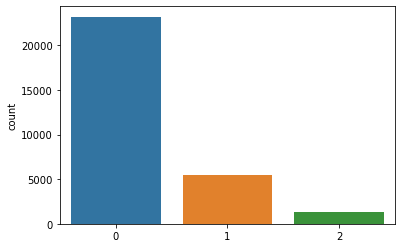

In [64]:
bJun = km.fit_predict(credit[['BILL_AMT4']])
sns.countplot(x=bJun, data=credit)

In [67]:
junTable = pd.DataFrame(bJun, credit['BILL_AMT4'])
junTable= junTable.rename(columns={'BILL_AMT4':'BILL_AMT4', 0:'clusters'})

show= junTable[junTable['clusters']==2]
show.sort_values(by='BILL_AMT4', ascending=True)

clusters
BILL_AMT4          
185925            2
185971            2
185995            2
186047            2
186140            2
...             ...
572805            2
616836            2
628699            2
706864            2
891586            2

[1296 rows x 1 columns]

- 23198 (77.22%) of credit loan users have a bill statement ranging from -170000 to 61168 in June 2005
- 5506 (18.43%) of credit loan users have a bill statement ranging from 61221 to 185694 in June 2005
- 1296 (4.35%) of credit loan users have a bill statement ranging from 185925 to 891586 in June 2005

<AxesSubplot:ylabel='count'>

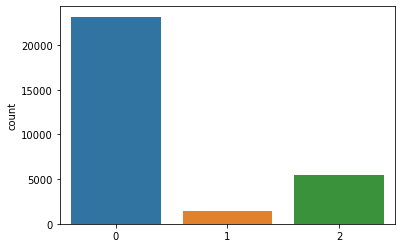

In [69]:
bMay = km.fit_predict(credit[['BILL_AMT5']])
sns.countplot(x=bMay, data=credit)

In [84]:
mayTable = pd.DataFrame(bMay, credit['BILL_AMT5'])
mayTable = mayTable.rename(columns={'BILL_AMT5':'BILL_AMT5', 0:'clusters'})

show = mayTable[mayTable['clusters']==2]
show.sort_values(by='BILL_AMT5', ascending=True)

clusters
BILL_AMT5          
56454             2
56467             2
56467             2
56479             2
56483             2
...             ...
170268            2
170540            2
170739            2
170786            2
170795            2

[5426 rows x 1 columns]

- 23,172 (77.40%) of credit loan users have a bill statement ranging from -81,334 to 56,445 in May 2005
- 5,426 (18.02%) of credit loan users have a bill statement ranging from 56,454 to 170,795 in May 2005
- 1,402 (4.58%) of credit loan users have a bill statement ranging from 170,885 to 927,171 in May 2005

<AxesSubplot:ylabel='count'>

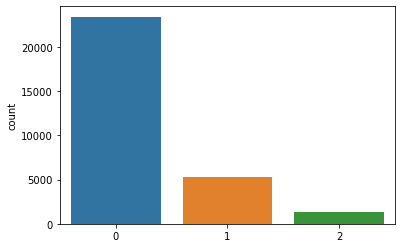

In [76]:
bApr = km.fit_predict(credit[['BILL_AMT6']])
sns.countplot(x=bApr, data=credit)

In [85]:
aprTable = pd.DataFrame(bApr, credit['BILL_AMT6'])
aprTable = aprTable.rename(columns={'BILL_AMT6':'BILL_AMT6', 0:'clusters'})

show = aprTable[aprTable['clusters']==2]
show.sort_values(by='BILL_AMT6', ascending=True)

clusters
BILL_AMT6          
171055            2
171059            2
171083            2
171106            2
171113            2
...             ...
527566            2
527711            2
568638            2
699944            2
961664            2

[1313 rows x 1 columns]

- 23,198 (78.11%) of credit loan users have a bill statement ranging from -339,603 to 56,735 in April 2005
- 5,506 (17.51%) of credit loan users have a bill statement ranging from 56,740 to 171,010 in April 2005
- 1,296 (4.38%) of credit loan users have a bill statement ranging from 171,055 to 961,664 in April 2005

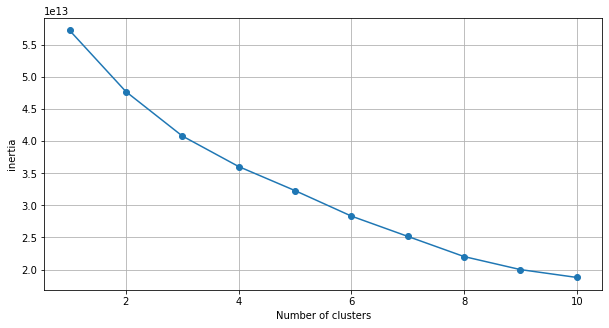

In [44]:
# identifying the cluster that works best for the 'amount of previous statement' columns
optKMeans(credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], 11)

best to work with 8 clusters

In [81]:
# applying k means clustering so we can analyze each feature 

km1 = KMeans(n_clusters=8, init= 'k-means++', max_iter=300, n_init=10, random_state=0)

<AxesSubplot:ylabel='count'>

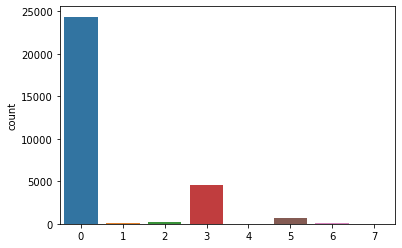

In [82]:
pSept = km1.fit_predict(credit[['PAY_AMT1']])
sns.countplot(x=pSept, data=credit)

In [95]:
sepTab = pd.DataFrame(pSept, credit['PAY_AMT1'])
sepTab = sepTab.rename(columns={'PAY_AMT1':'PAY_AMT1', 0:'clusters'})

show = sepTab[sepTab['clusters']==6]
show.sort_values(by='PAY_AMT1', ascending=True)

clusters
PAY_AMT1          
114402           6
114482           6
114558           6
115041           6
115718           6
...            ...
189717           6
191446           6
193358           6
194000           6
195316           6

[74 rows x 1 columns]

- 24,380 of credit loan users have an amount of previous statement ranging from 0 to 6,630 in September 2005
- 4,528 of credit loan users have an amount of previous statement ranging from 6,636 to 23,348 in September 2005
- 710 of credit loan users have an amount of previous statement ranging from 23,518 to 56,613 in September 2005
- 264 of credit loan users have an amount of previous statement ranging from 57,087 to 112,000 in September 2005
- 118 of credit loan users have a collective amount of previous statement ranging from 114,402 to 873,552 in September 2005

<AxesSubplot:ylabel='count'>

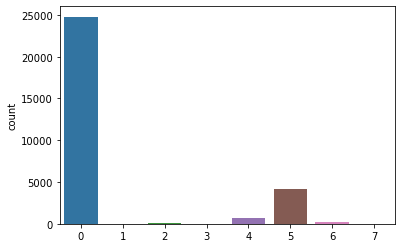

In [96]:
pAug = km1.fit_predict(credit[['PAY_AMT2']])
sns.countplot(x=pAug, data=credit)

In [102]:
augTab = pd.DataFrame(pAug, credit['PAY_AMT2'])
augTab = augTab.rename(columns={'PAY_AMT2':'PAY_AMT2', 0:'clusters'})

show = augTab[augTab['clusters']==7]
show.sort_values(by='PAY_AMT2', ascending=True)

clusters
PAY_AMT2          
1684259          7

- 24,781 of credit loan users have an amount of previous statement ranging from 0 to 6,978 in August 2005
- 3,847 of credit loan users have an amount of previous statement ranging from 6,980 to 25,770 in August 2005
- 655 of credit loan users have an amount of previous statement ranging from 25,885 to 67,000 in August 2005
- 345 of credit loan users have a collective amount of previous statement ranging from 67,533 to 1,684,259 in August 2005

<AxesSubplot:ylabel='count'>

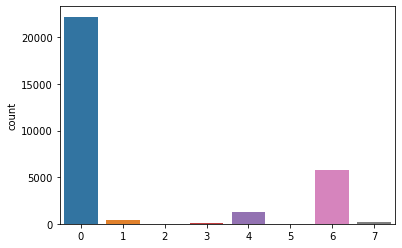

In [106]:
pJul = km1.fit_predict(credit[['PAY_AMT3']])
sns.countplot(x=pJul, data=credit)

In [117]:
junTab = pd.DataFrame(pJul, credit['PAY_AMT3'])
junTab = junTab.rename(columns={'PAY_AMT3':'PAY_AMT3', 0:'clusters'})

show = junTab[junTab['clusters']==5]
show.sort_values(by='PAY_AMT3', ascending=True)

clusters
PAY_AMT3          
889043           5
896040           5

- 22,207 of credit loan users have an amount of previous statement ranging from 0 to 4,267 in July 2005
- 5,816 of credit loan users have an amount of previous statement ranging from 4,270 to 13,943 in July 2005
- 1,304 of credit loan users have an amount of previous statement ranging from 13,955 to 34,874 in July 2005
- 396 of credit loan users have an amount of previous statement ranging from 35,000 to 74,934 in July 2005
- 277 of credit loan users have a collective amount of previous statement ranging from 75,743 to 896,040 in July 2005

<AxesSubplot:ylabel='count'>

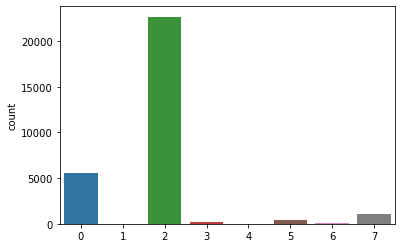

In [118]:
pJun = km1.fit_predict(credit[['PAY_AMT4']])
sns.countplot(x=pJun, data=credit)

In [127]:
junTab = pd.DataFrame(pJun, credit['PAY_AMT4'])
junTab = junTab.rename(columns={'PAY_AMT4':'PAY_AMT4', 0:'clusters'})

show = junTab[junTab['clusters']==4]
show.sort_values(by='PAY_AMT4', ascending=True)

clusters
PAY_AMT4          
400046           4
432130           4
497000           4
528897           4
621000           4

- 22,669 of credit loan users have an amount of previous statement ranging from 0 to 4,176 in June 2005
- 5,588 of credit loan users have an amount of previous statement ranging from 4,178 to 14,344 in June 2005
- 1,084 of credit loan users have an amount of previous statement ranging from 14,359 to 35,696 in June 2005
- 400 of credit loan users have an amount of previous statement ranging from 35,890 to 72,011 in June 2005
- 259 of credit loan users have a collective amount of previous statement ranging from 72,836 to 621,000 in June 2005

<AxesSubplot:ylabel='count'>

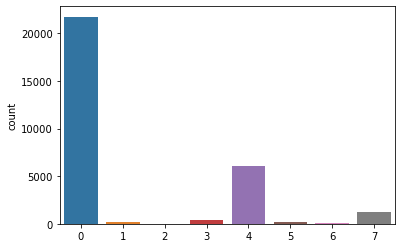

In [128]:
pMay = km1.fit_predict(credit[['PAY_AMT5']])
sns.countplot(x=pMay, data=credit)

In [139]:
mayTab = pd.DataFrame(pMay, credit['PAY_AMT5'])
mayTab = mayTab.rename(columns={'PAY_AMT5':'PAY_AMT5', 0:'clusters'})

show = mayTab[mayTab['clusters']==6]
show.sort_values(by='PAY_AMT5', ascending=True)

clusters
PAY_AMT5          
139898           6
140000           6
141711           6
142000           6
142195           6
...            ...
223765           6
230000           6
231133           6
235024           6
245000           6

[68 rows x 1 columns]

- 21,752 of credit loan users have an amount of previous statement ranging from 0 to 3,693 in May 2005
- 6,086 of credit loan users have an amount of previous statement ranging from 3,694 to 11,514 in May 2005
- 1,260 of credit loan users have an amount of previous statement ranging from 11,540 to 25,213 in May 2005
- 427 of credit loan users have an amount of previous statement ranging from 25,298 to 45,812 in May 2005
- 475  of credit loan users have a collective amount of previous statement ranging from 46,100 to 873,552 in May 2005

<AxesSubplot:ylabel='count'>

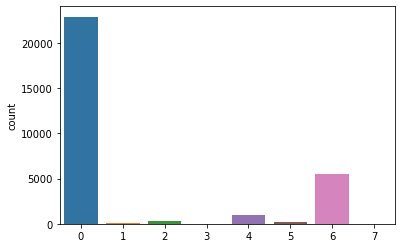

In [140]:
pApr = km1.fit_predict(credit[['PAY_AMT6']])
sns.countplot(x=pApr, data=credit)

In [152]:
aprTab = pd.DataFrame(pApr, credit['PAY_AMT6'])
aprTab = aprTab.rename(columns={'PAY_AMT1':'PAY_AMT6', 0:'clusters'})

show = aprTab[aprTab['clusters']==2]
show.sort_values(by='PAY_AMT6', ascending=True)

clusters
PAY_AMT6          
39500            2
39526            2
39544            2
39777            2
40000            2
...            ...
77005            2
77195            2
77233            2
77325            2
77412            2

[359 rows x 1 columns]

- 22,893 of credit loan users have an amount of previous statement ranging from 0 to 4,337 in April 2005
- 5,479 of credit loan users have an amount of previous statement ranging from 4,338 to 15,816 in April 2005
- 952 of credit loan users have an amount of previous statement ranging from 15,833 to 39,441 in April 2005
- 359 of credit loan users have an amount of previous statement ranging from 39,500 to 77,412 in April 2005
- 317 of credit loan users have a collective amount of previous statement ranging from 79,027 to 528,666 in April 2005

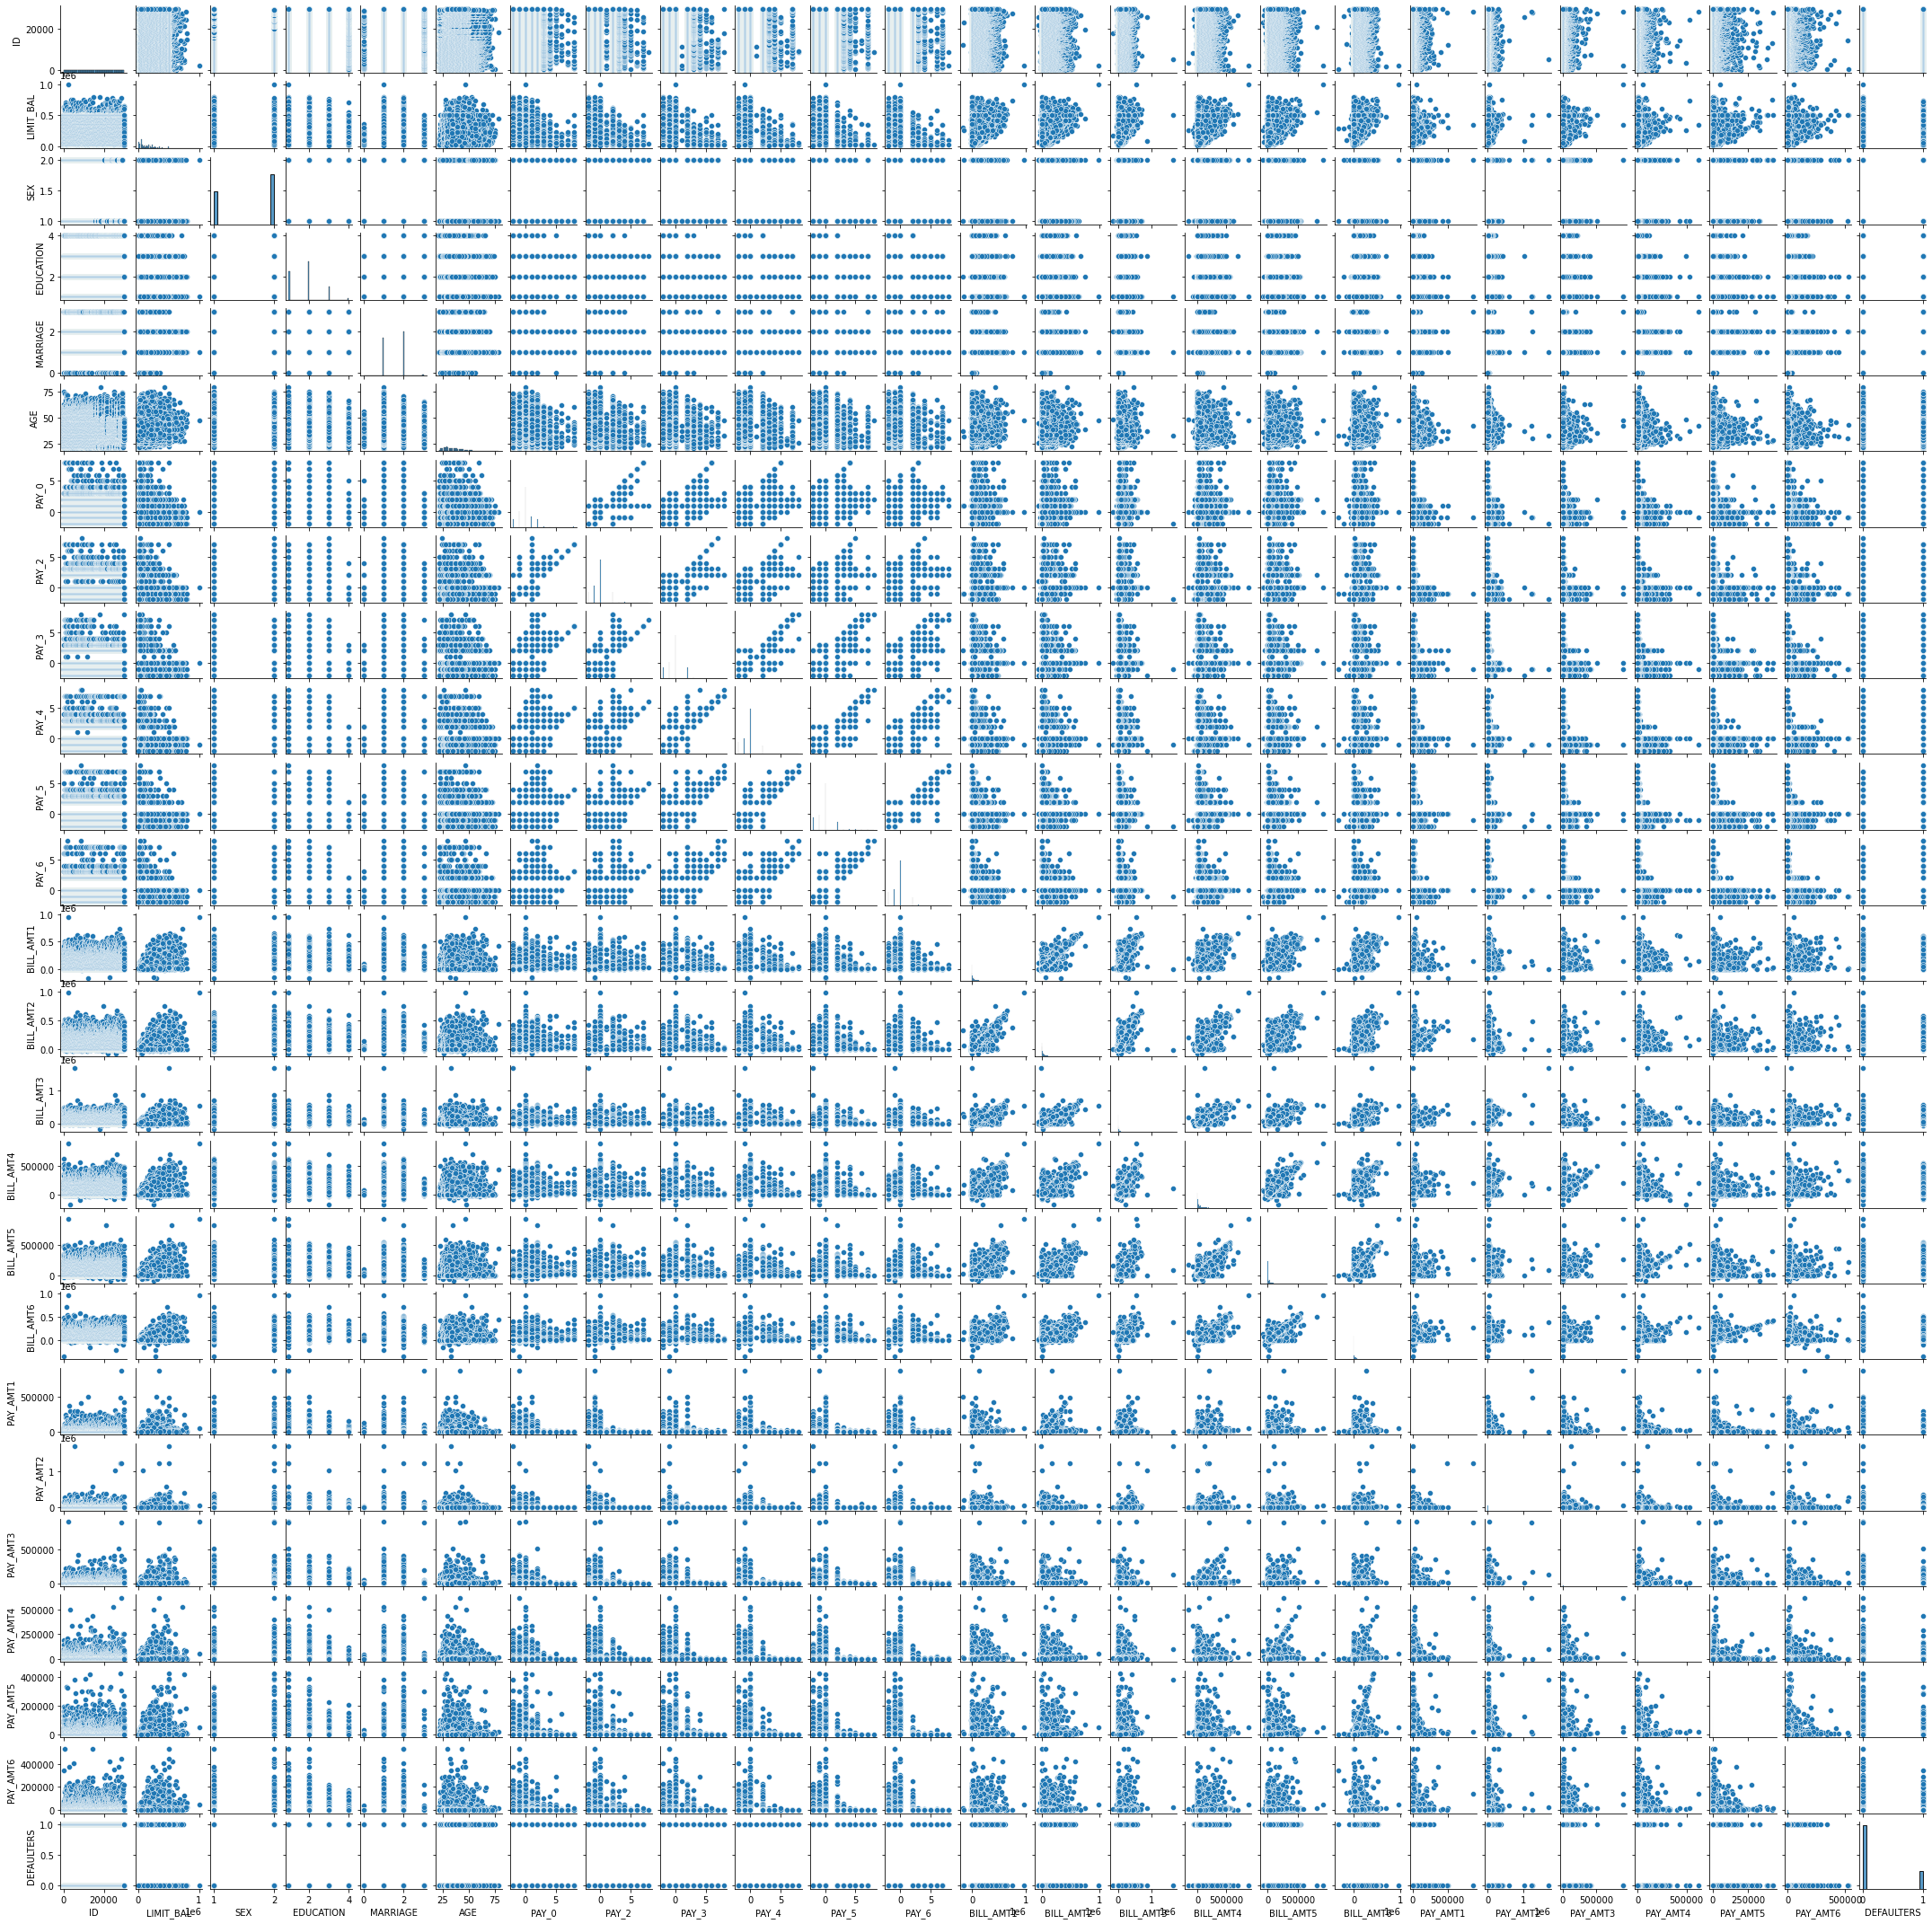

In [60]:
sns.pairplot(credit)
plt.gcf().set_size_inches(30,30)

<AxesSubplot:>

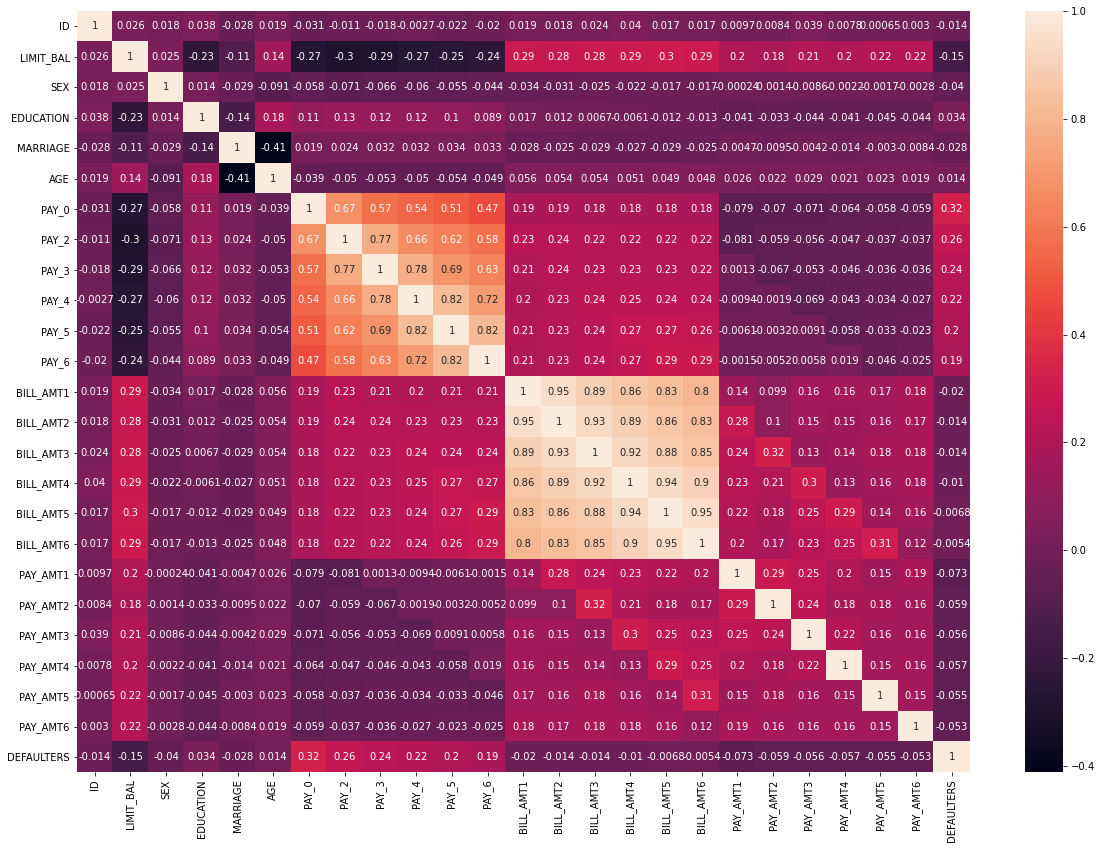

In [93]:
set_option('display.width', 100)
plt.figure(figsize=(20,14))
sns.heatmap(credit.corr(), annot=True)

# Analysing the pairs that have  strong correlations/relationships

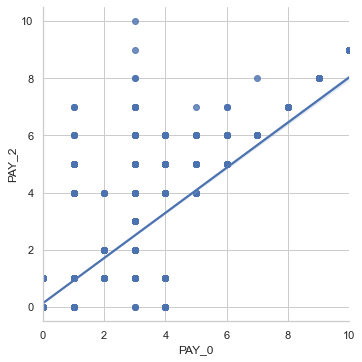

In [111]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_0", y="PAY_2" , data=credit)

This means that almost all who delayed payment for a specific amount of month(s) in August 2005 also delayed payment in September 2005

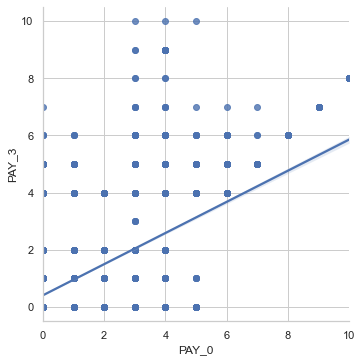

In [112]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_0", y="PAY_3" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in July 2005 also delayed payment in September 2005

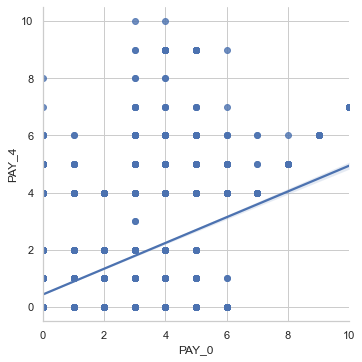

In [113]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_0", y="PAY_4" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in June 2005 also delayed payment in September 2005

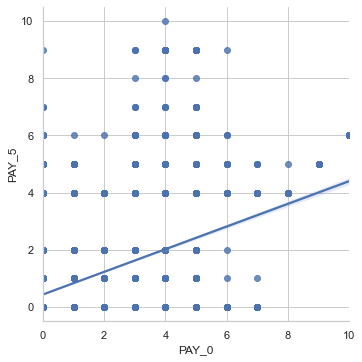

In [114]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_0", y="PAY_5" , data=credit)

This means that a considerable amount of people who delayed payment for a specific amount of month(s) in May 2005 also delayed payment in September 2005

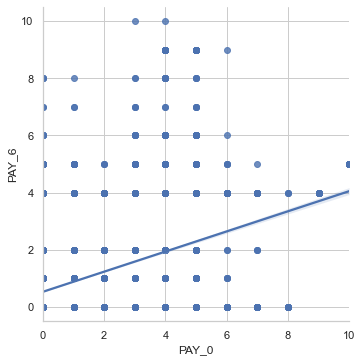

In [115]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_0", y="PAY_6" , data=credit)

This means that a considerable amount of people who delayed payment for a specific amount of month(s) in April 2005 also delayed payment in September 2005

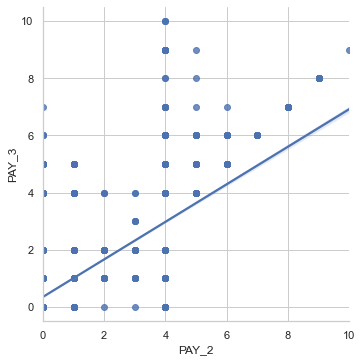

In [116]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_2", y="PAY_3" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in July 2005 also delayed payment in August 2005

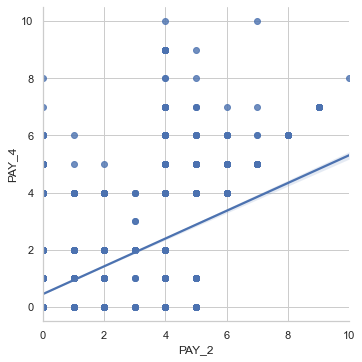

In [117]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_2", y="PAY_4" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in June 2005 also delayed payment in August 2005

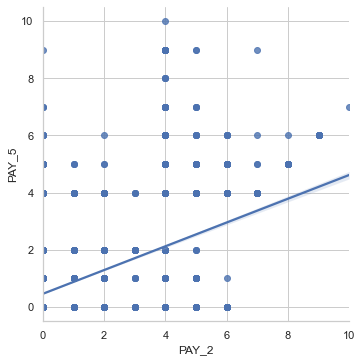

In [118]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_2", y="PAY_5" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in May 2005 also delayed payment in August 2005

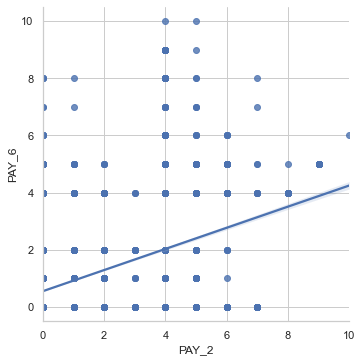

In [119]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_2", y="PAY_6" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in April 2005 also delayed payment in August 2005

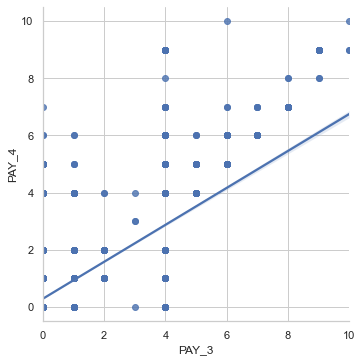

In [120]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_3", y="PAY_4" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in June 2005 also delayed payment in July 2005

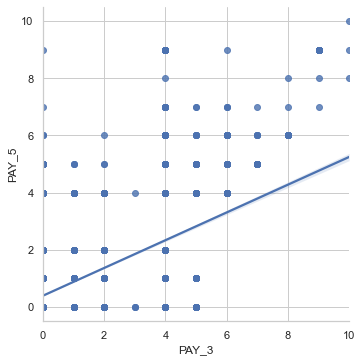

In [121]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_3", y="PAY_5" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in May 2005 also delayed payment in July 2005

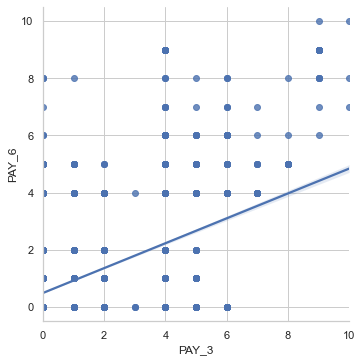

In [122]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_3", y="PAY_6" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in April 2005 also delayed payment in July 2005

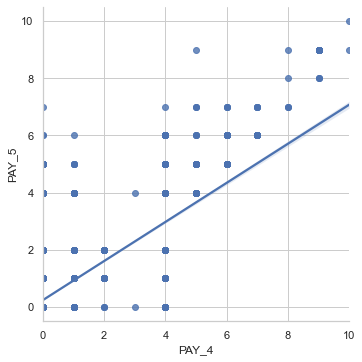

In [123]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_4", y="PAY_5" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in May 2005 also delayed payment in June 2005

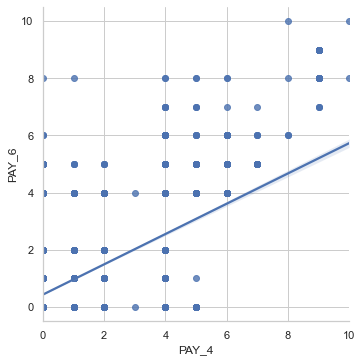

In [124]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_4", y="PAY_6" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in April 2005 also delayed payment in June 2005

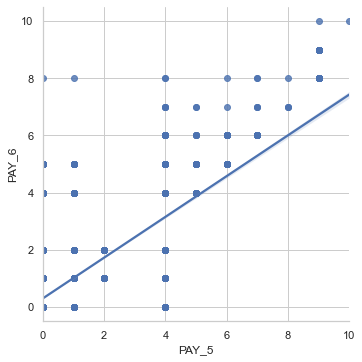

In [125]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="PAY_5", y="PAY_6" , data=credit)

This means that a significant number of people who delayed payment for a specific amount of month(s) in April 2005 also delayed payment in May 2005

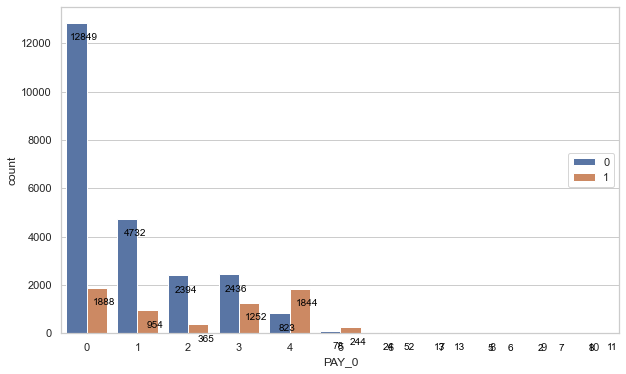

In [127]:
ca = sns.countplot(x="PAY_0", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)

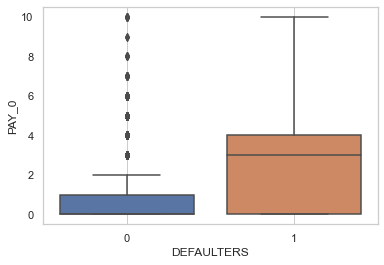

In [128]:
sns.boxplot(x='DEFAULTERS', y='PAY_0', data=credit)
plt.grid()

Combining both charts we can see that:
- More people who have delayed payment for 3 months (represented by 3 on the PAY_0 charts) leading to the end of September 2005 defaulted payments for September 2005
- people who have delayed payments for 2 months (represented by 2 on the PAY_0 charts) leading to the end of September 2005 pass as a red flag on default payments for September 2005

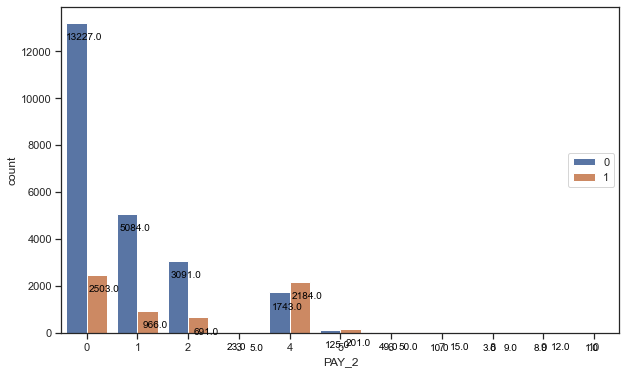

In [133]:
ca = sns.countplot(x="PAY_2", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

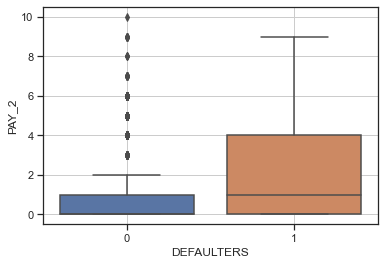

In [132]:
sns.boxplot(x='DEFAULTERS', y='PAY_2', data=credit)
plt.grid()

Combining both charts we can see that:
- More people who have delayed payment for 2 months (represented by 2 on the PAY_2 charts) leading to the end of August 2005 defaulted payments for August 2005
- people who have delayed payments for 1 month (represented by 1 on the PAY_2 charts) leading to the end of August 2005 pass as a red flag on default payments for August 2005

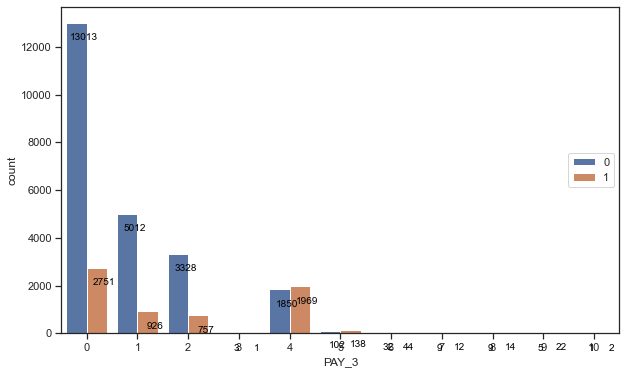

In [134]:
ca = sns.countplot(x="PAY_3", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

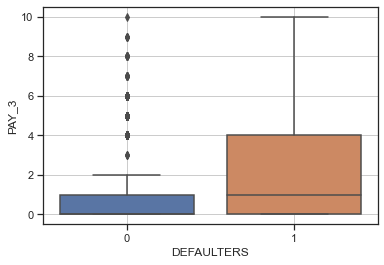

In [136]:
sns.boxplot(x='DEFAULTERS', y='PAY_3', data=credit)
plt.grid()

Combining both charts we can see that:
- More people who have delayed payment for 2 months (represented by 2 on the PAY_3 charts) leading to the end of July 2005 defaulted payments for July 2005
- people who have delayed payments for 1 month (represented by 1 on the PAY_3 charts) leading to the end of July 2005 pass as a red flag on default payments for July 2005

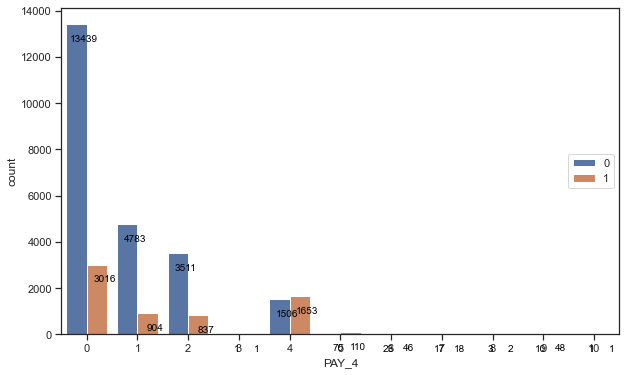

In [137]:
ca = sns.countplot(x="PAY_4", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

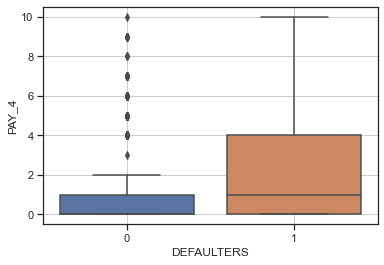

In [139]:
sns.boxplot(x='DEFAULTERS', y='PAY_4', data=credit)
plt.grid()

Combining both charts we can see that:
- More people who have delayed payment for 2 months (represented by 2 on the PAY_3 charts) leading to the end of June 2005 defaulted payments for June 2005
- people who have delayed payments for 1 month (represented by 1 on the PAY_3 charts) leading to the end of June 2005 pass as a red flag on default payments for June 2005

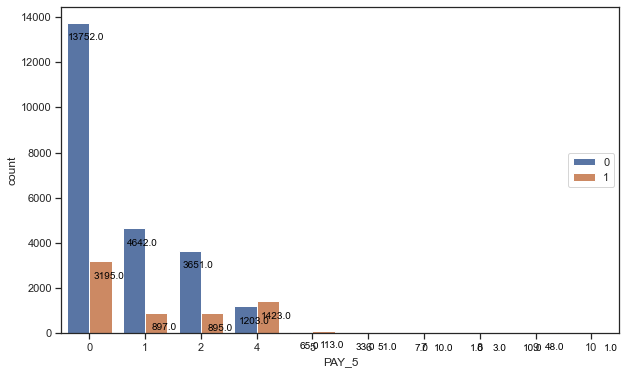

In [142]:
ca = sns.countplot(x="PAY_5", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

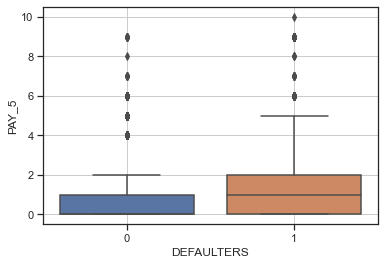

In [141]:
sns.boxplot(x='DEFAULTERS', y='PAY_5', data=credit)
plt.grid()

Combining both charts we can see that:
- More people who have delayed payment for 2 months (represented by 2 on the PAY_3 charts) leading to the end of May 2005 defaulted payments for May 2005
- people who have delayed payments for 1 month (represented by 1 on the PAY_3 charts) leading to the end of May 2005 pass as a red flag on default payments for May 2005

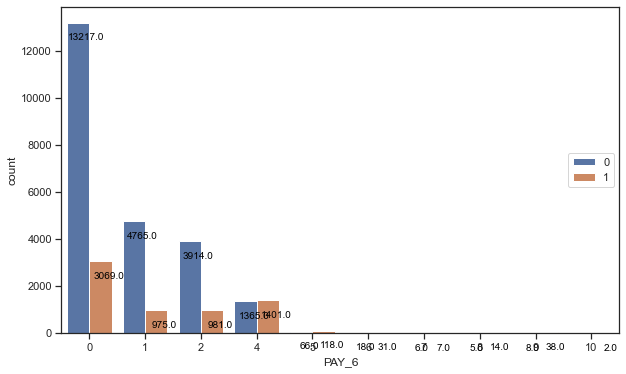

In [143]:
ca = sns.countplot(x="PAY_6", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

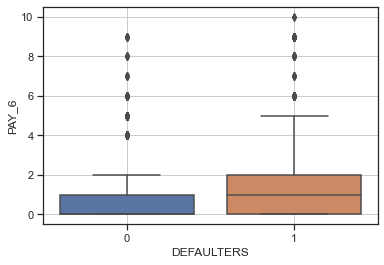

In [144]:
sns.boxplot(x='DEFAULTERS', y='PAY_6', data=credit)
plt.grid()

Combining both charts we can see that:
- More people who have delayed payment for 2 months (represented by 2 on the PAY_3 charts) leading to the end of April 2005 defaulted payments for April 2005
- people who have delayed payments for 1 month (represented by 1 on the PAY_3 charts) leading to the end of April 2005 pass as a red flag on default payments for April 2005

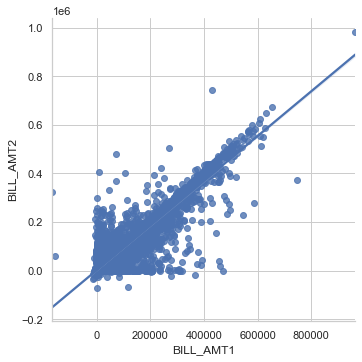

In [234]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT1", y="BILL_AMT2" , data=credit)

As the amount on each credit loan user's bill statement increases in August 2005(BILL_AMT2) it also increases in September 2005(BILL_AMT1)

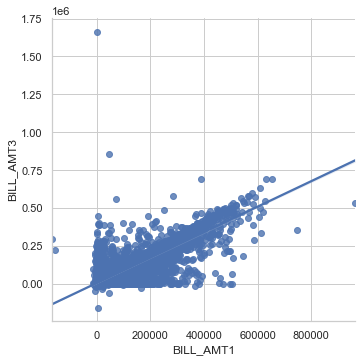

In [229]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT1", y="BILL_AMT3" , data=credit)

As the amount on each credit loan user's bill statement increases in July 2005(BILL_AMT3) it also increases in September 2005(BILL_AMT1)

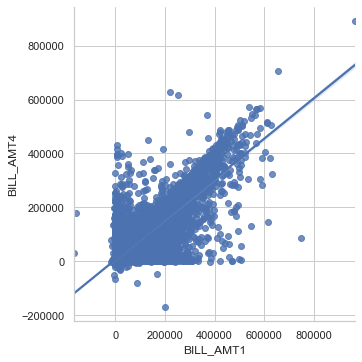

In [230]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT1", y="BILL_AMT4" , data=credit)

As the amount on each credit loan user's bill statement increases in June 2005(BILL_AMT4) it also increases in September 2005(BILL_AMT1)

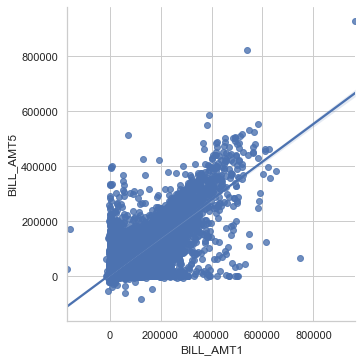

In [231]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT1", y="BILL_AMT5" , data=credit)

As the amount on each credit loan user's bill statement increases in May 2005(BILL_AMT5) it also increases in September 2005(BILL_AMT1)

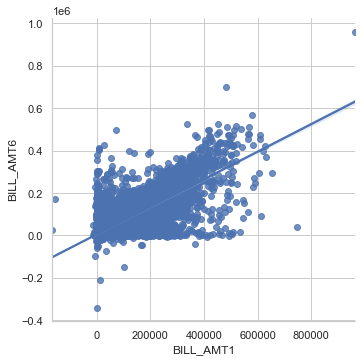

In [235]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT1", y="BILL_AMT6" , data=credit)

As the amount on each credit loan user's bill statement increases in April 2005(BILL_AMT6) it also increases in September 2005(BILL_AMT1)

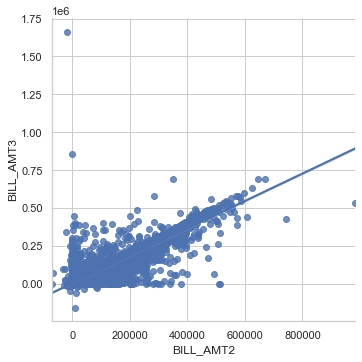

In [236]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT2", y="BILL_AMT3" , data=credit)

As the amount on each credit loan user's bill statement increases in July 2005(BILL_AMT3) it also increases in August 2005(BILL_AMT2)

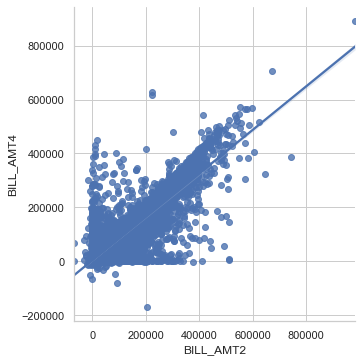

In [237]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT2", y="BILL_AMT4" , data=credit)

As the amount on each credit loan user's bill statement increases in June 2005(BILL_AMT4) it also increases in August 2005(BILL_AMT2)

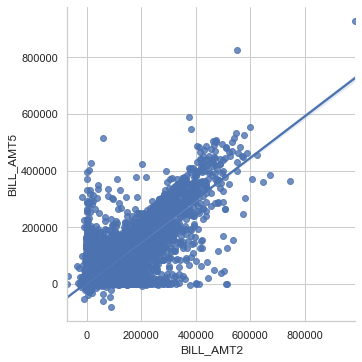

In [238]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT2", y="BILL_AMT5" , data=credit)

As the amount on each credit loan user's bill statement increases in May 2005(BILL_AMT5) it also increases in August 2005(BILL_AMT2)

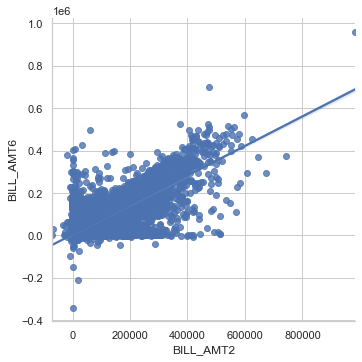

In [239]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT2", y="BILL_AMT6" , data=credit)

As the amount on each credit loan user's bill statement increases in April 2005(BILL_AMT6) it also increases in August 2005(BILL_AMT2)

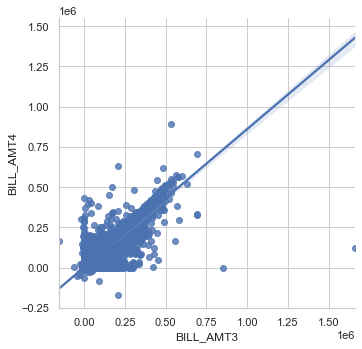

In [240]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT3", y="BILL_AMT4" , data=credit)

As the amount on each credit loan user's bill statement increases in June 2005(BILL_AMT4) it also increases in July 2005(BILL_AMT3)

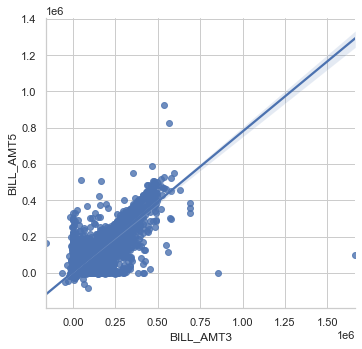

In [241]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT3", y="BILL_AMT5" , data=credit)

As the amount on each credit loan user's bill statement increases in May 2005(BILL_AMT5) it also increases in July 2005(BILL_AMT3)

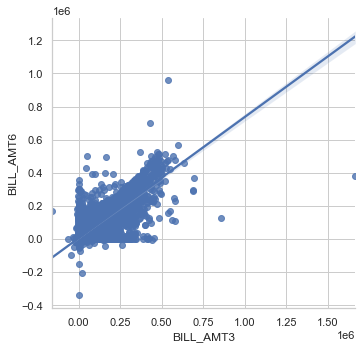

In [242]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT3", y="BILL_AMT6" , data=credit)

As the amount on each credit loan user's bill statement increases in April 2005(BILL_AMT6) it also increases in July 2005(BILL_AMT3)

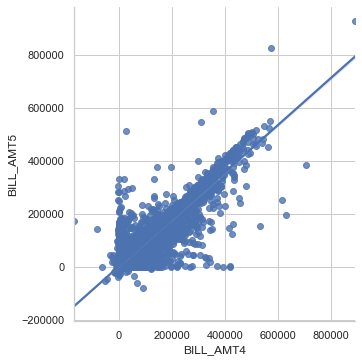

In [243]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT4", y="BILL_AMT5" , data=credit)

As the amount on each credit loan user's bill statement increases in May 2005(BILL_AMT5) it also increases in June 2005(BILL_AMT4)

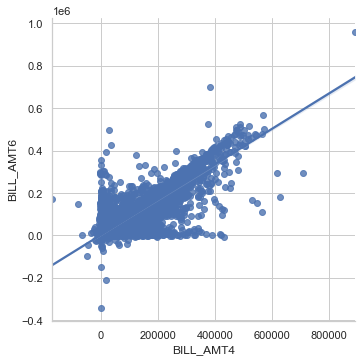

In [244]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT4", y="BILL_AMT6" , data=credit)

As the amount on each credit loan user's bill statement increases in April 2005(BILL_AMT5) it also increases in June 2005(BILL_AMT4)

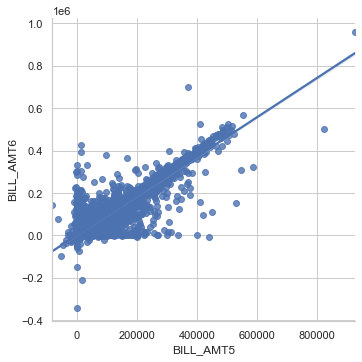

In [245]:
sns.set(style="whitegrid")
pp = sns.lmplot(x="BILL_AMT5", y="BILL_AMT6" , data=credit)

As the amount on each credit loan user's bill statement increases in April 2005(BILL_AMT6) it also increases in May 2005(BILL_AMT5)

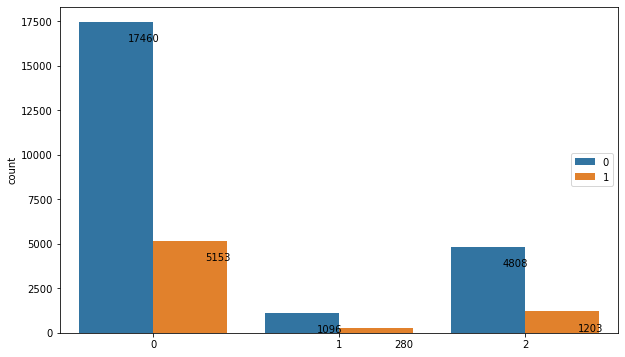

In [153]:
ca = sns.countplot(x=bSept, hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The credit loan users with a bill statement ranging from -165,580 to 68,288 have the highest amount of defaulters for September 2005
- They are slightly followed by credit loan users with a bill statement ranging from 68,321 to 207,627

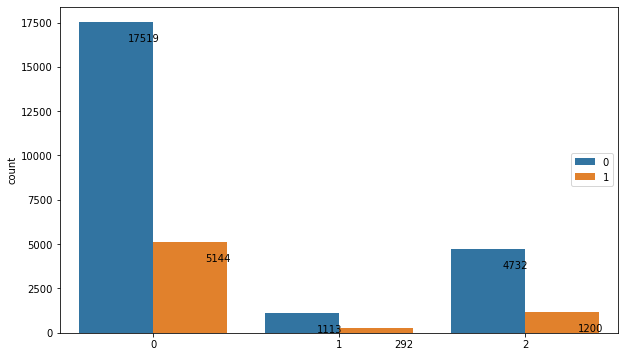

In [154]:
ca = sns.countplot(x=bAug, hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The credit loan users with a bill statement ranging from -69,777 to 65,585 have the highest amount of defaulters for August 2005
- They are slightly followed by credit loan users with a bill statement ranging from 65,605 to 199,379

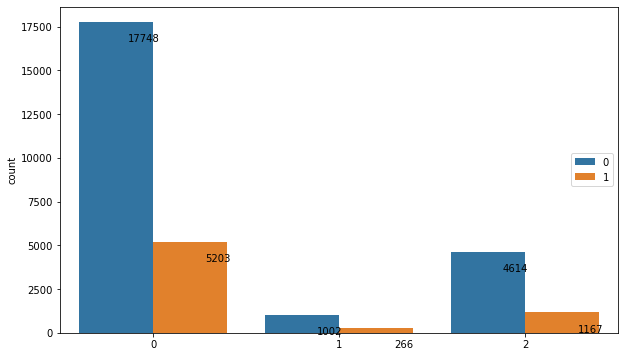

In [155]:
ca = sns.countplot(x=bJul, hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The credit loan users with a bill statement ranging from -157,264 to 65,068 have the highest amount of defaulters for July 2005
- They are slightly followed by credit loan users with a bill statement ranging from 65,119 to 199,393

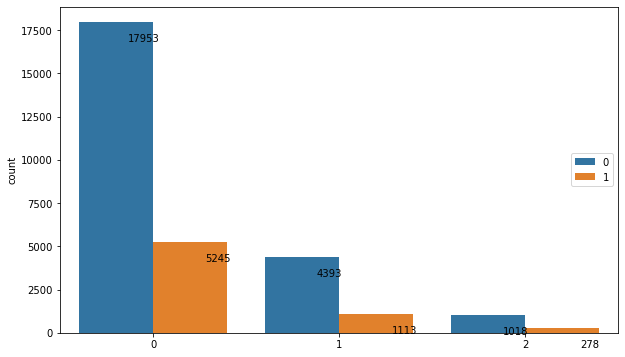

In [156]:
ca = sns.countplot(x=bJun, hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The credit loan users with a bill statement ranging from -170000 to 61168 have the highest amount of defaulters for June 2005
- They are slightly followed by credit loan users with a bill statement ranging from 61221 to 185694

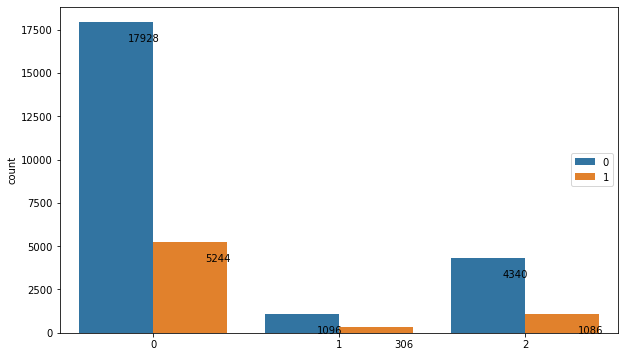

In [157]:
ca = sns.countplot(x=bMay, hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The credit loan users with a bill statement ranging from -81,334 to 56,445 have the highest amount of defaulters for May 2005
- They are slightly followed by credit loan users with a bill statement ranging from 56,454 to 170,795

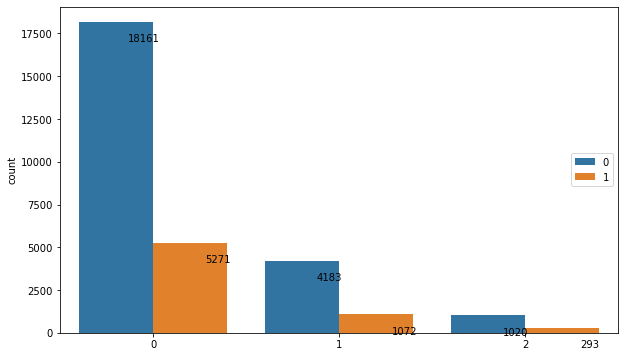

In [158]:
ca = sns.countplot(x=bApr, hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- The credit loan users with a bill statement ranging from -339,603 to 56,735 have the highest amount of defaulters for August 2005
- They are slightly followed by credit loan users with a bill statement ranging from 56,740 to 171,010

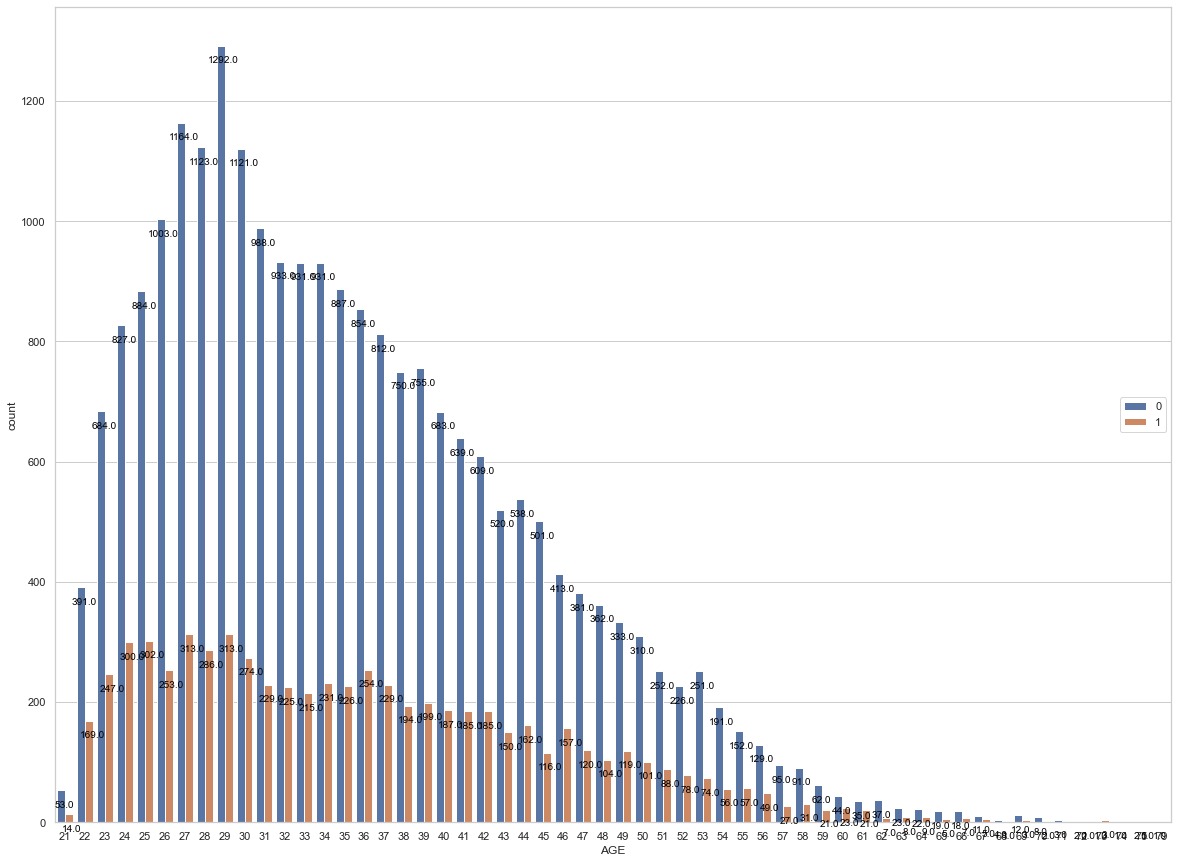

In [253]:
ca = sns.countplot(x="AGE", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(20,15)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

A good number of defaulters are of ages 22-56

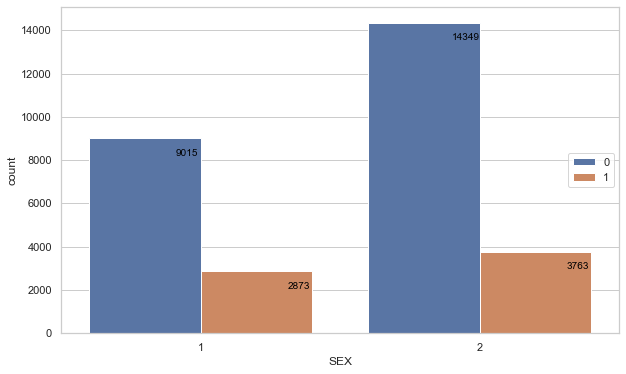

In [278]:
ca = sns.countplot(x="SEX", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

Females default much more than males. Although they also outnumber males in total as credit loan users

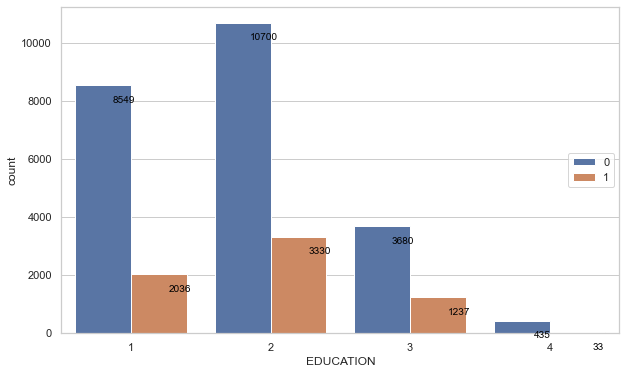

In [249]:
othersE = (credit.EDUCATION==0)|(credit.EDUCATION==5)|(credit.EDUCATION==6)
credit.loc[othersE,'EDUCATION']=4

ca = sns.countplot(x="EDUCATION", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

- University students have the highest rate of defaulters
- They are followed by graduate school students

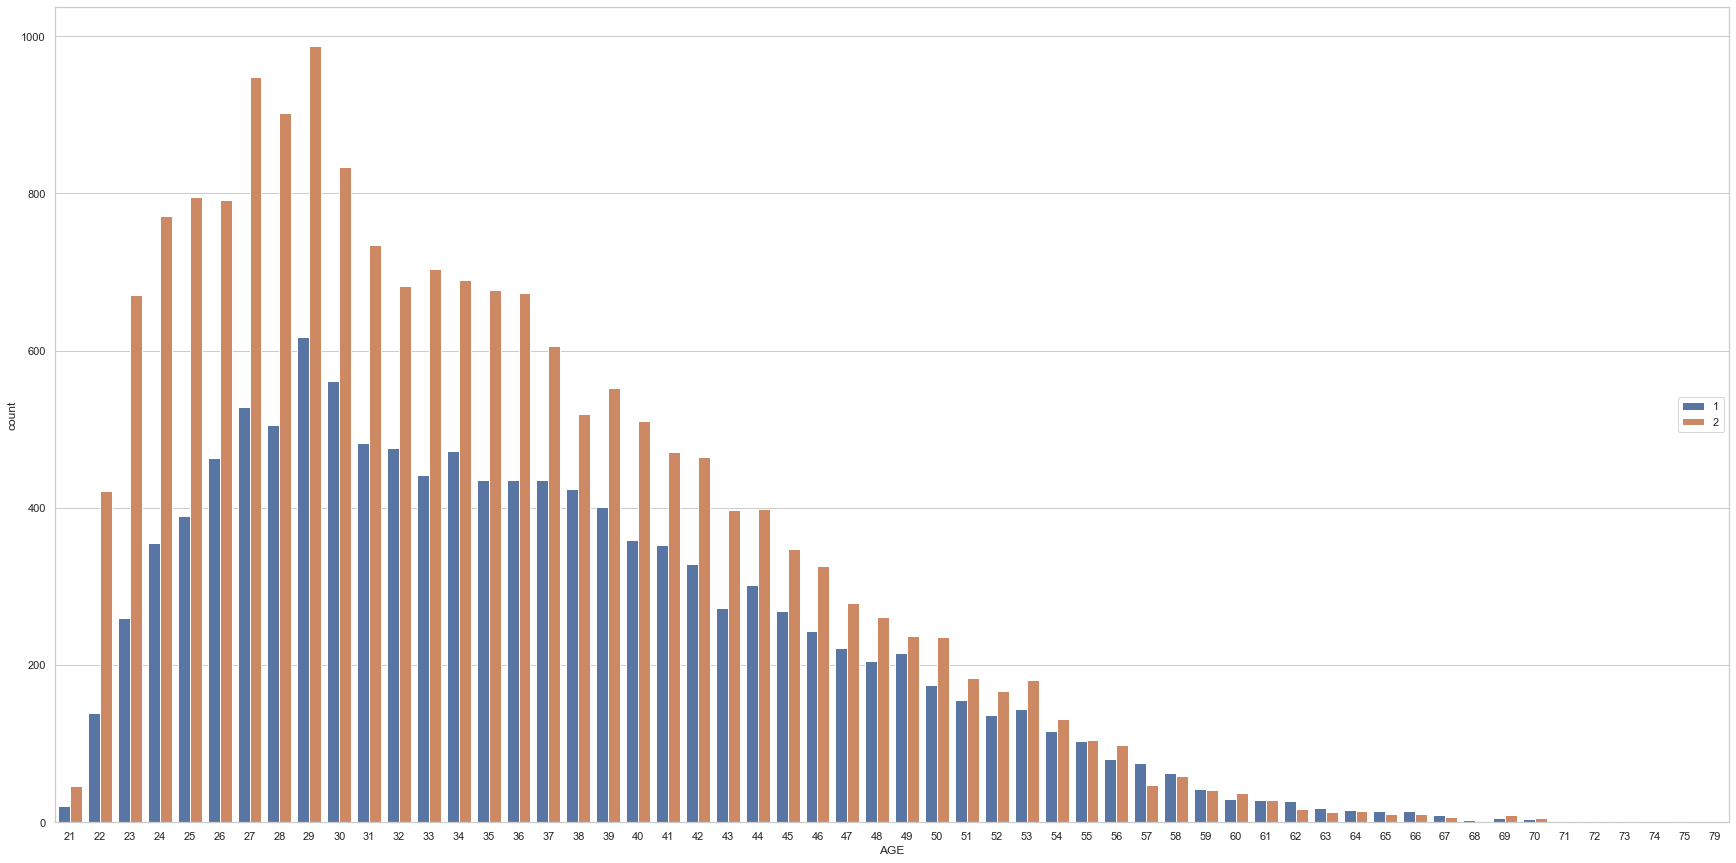

In [263]:
ca = sns.countplot(x="AGE", hue="SEX", data=credit)
plt.gcf().set_size_inches(30,15)
plt.legend(loc='right')
plt.show()

Most of the credit loan owners ages 21-56 are Females

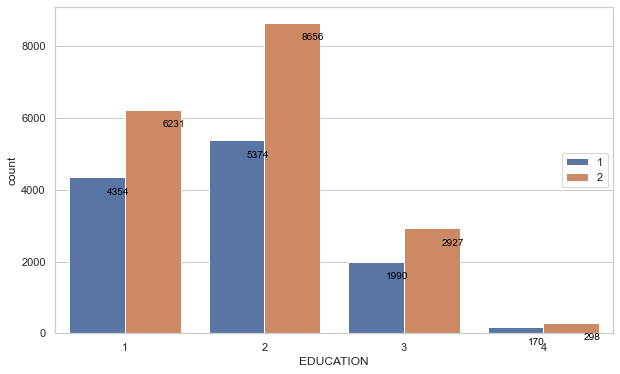

In [251]:
ca = sns.countplot(x="EDUCATION", hue="SEX", data=credit)
plt.gcf().set_size_inches(10,6)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

More female credit loan owners pursue education than the males

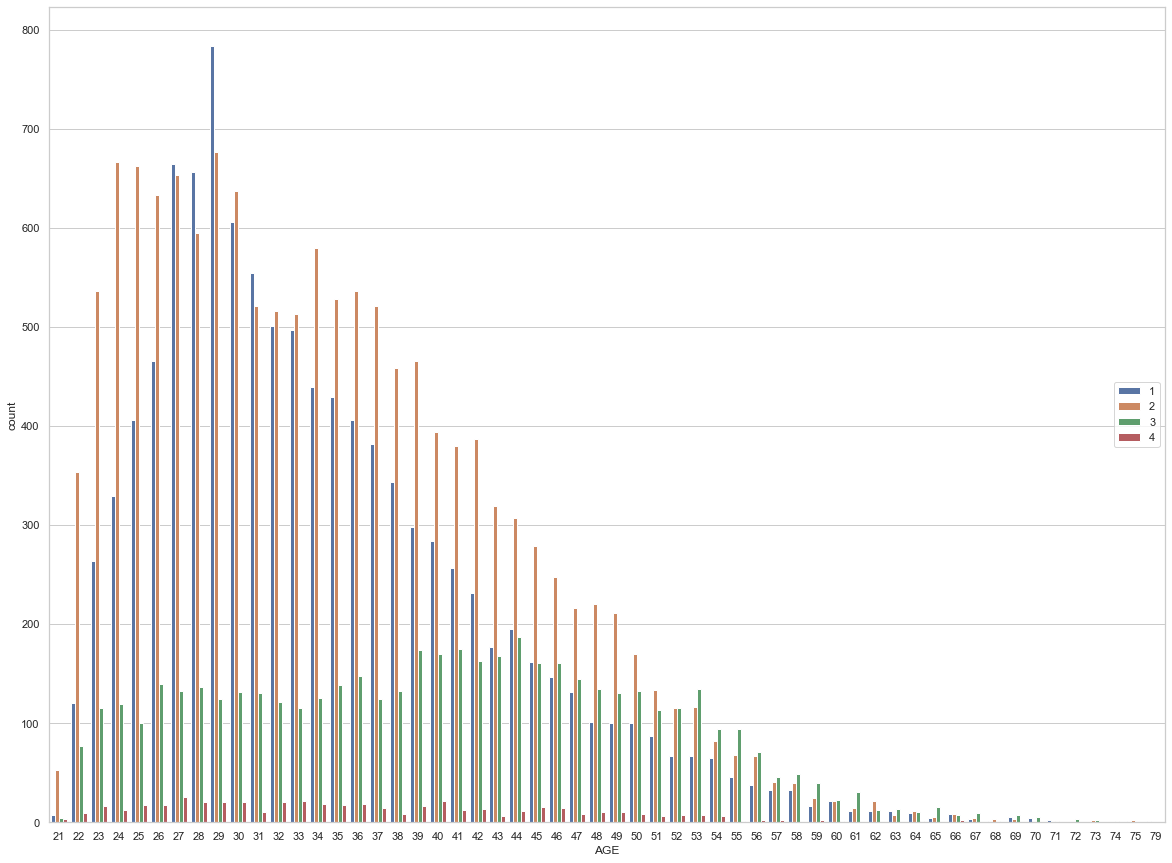

In [255]:
ca = sns.countplot(x="AGE", hue="EDUCATION", data=credit)
plt.gcf().set_size_inches(20,15)
plt.legend(loc='right')
plt.show()

- Most of the credit loan owners are University students of ages 21-51
- graduate students also make up for a good number of credit loan users

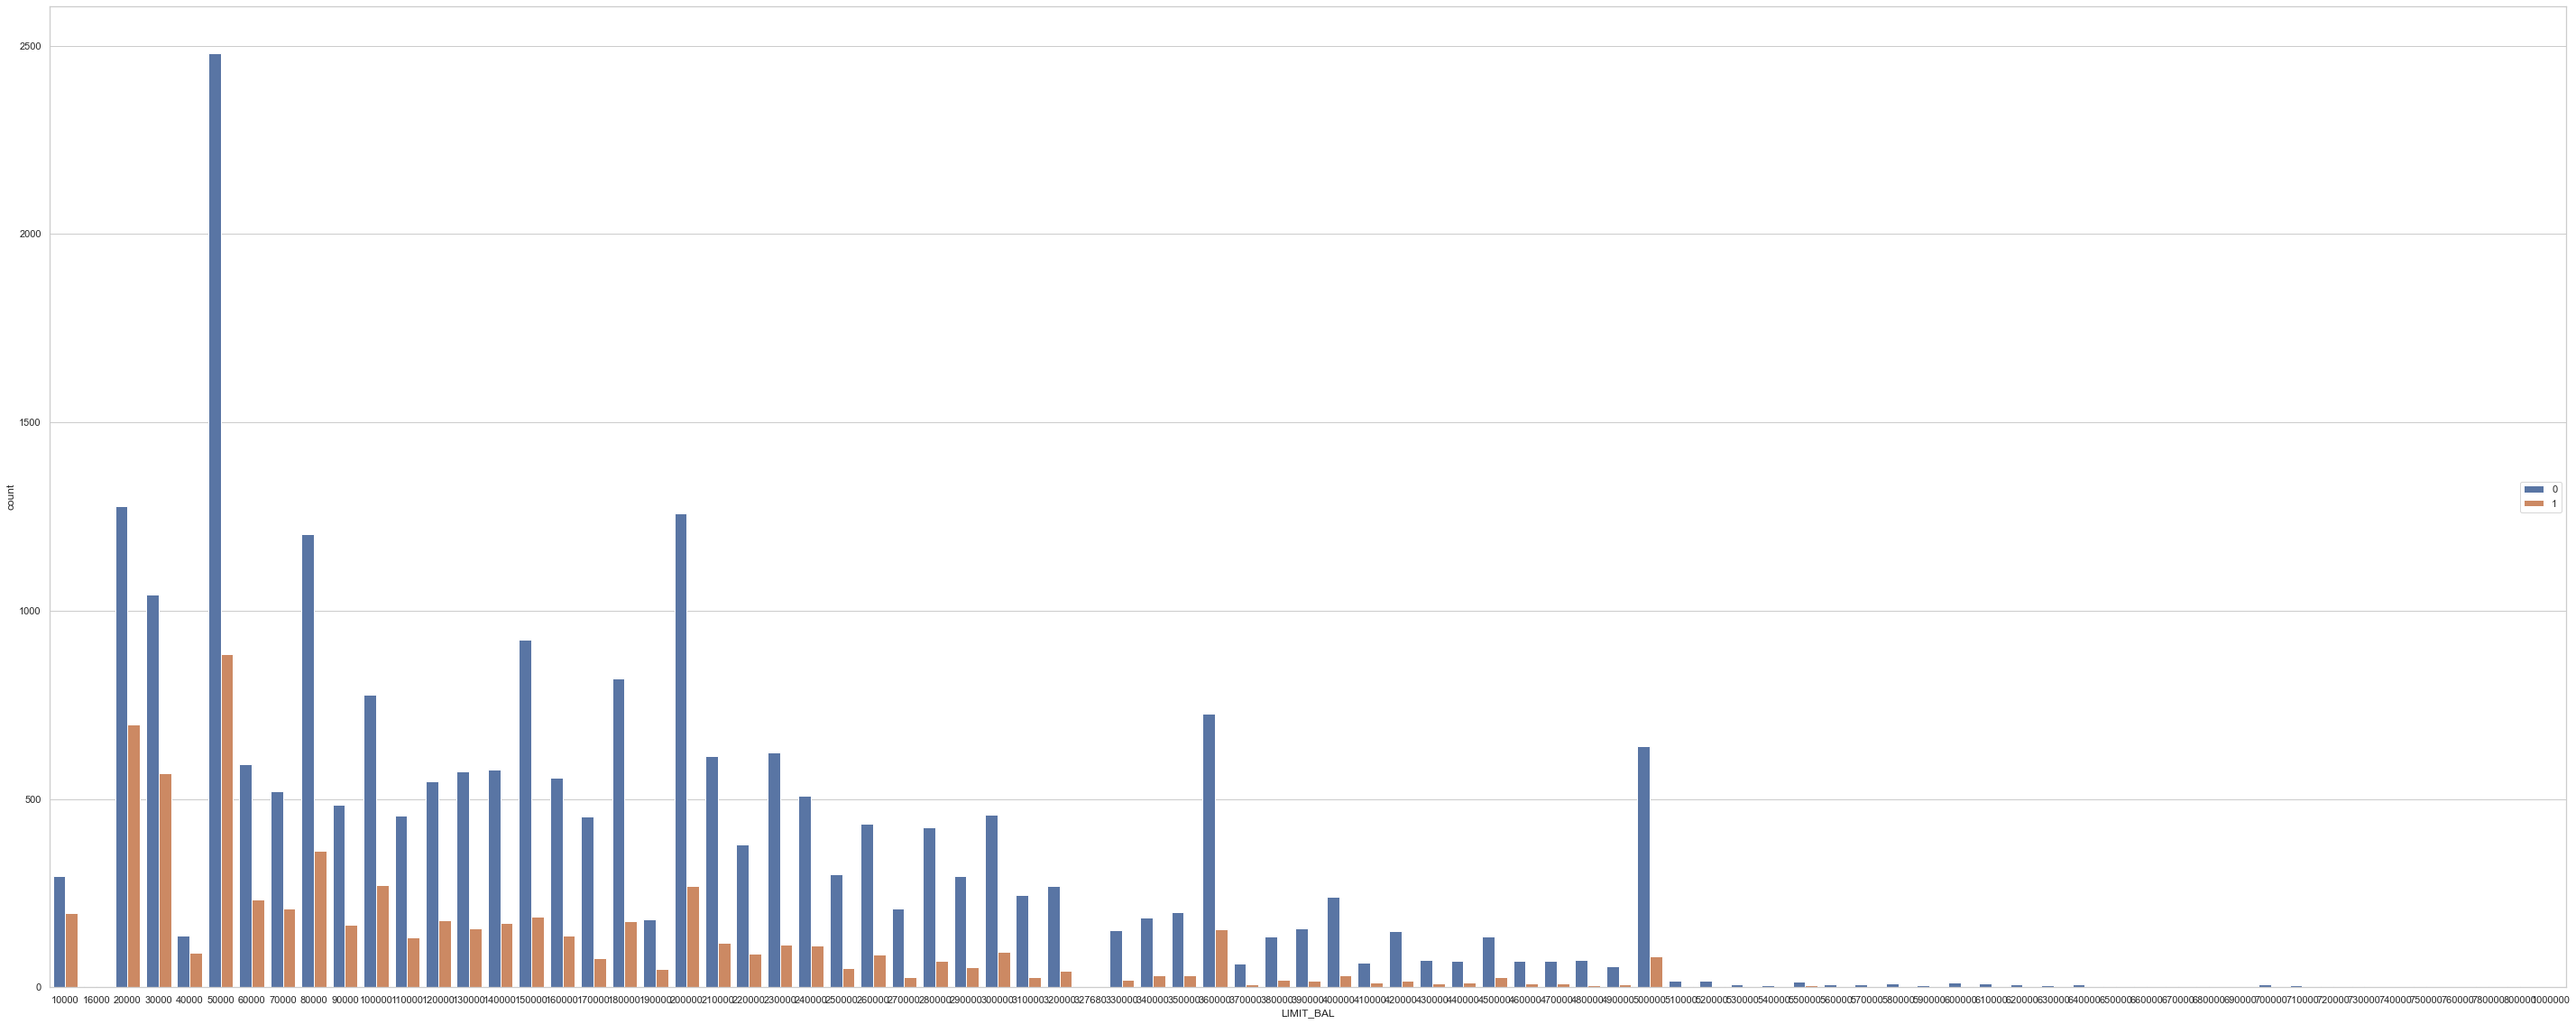

In [260]:
ca = sns.countplot(x="LIMIT_BAL", hue="DEFAULTERS", data=credit)
plt.gcf().set_size_inches(50,20)
plt.legend(loc='right')
plt.show()

- People with a limit balance on credit of 50000, 20000, 30000, and 80000 have the highest rate of defaulters respectively

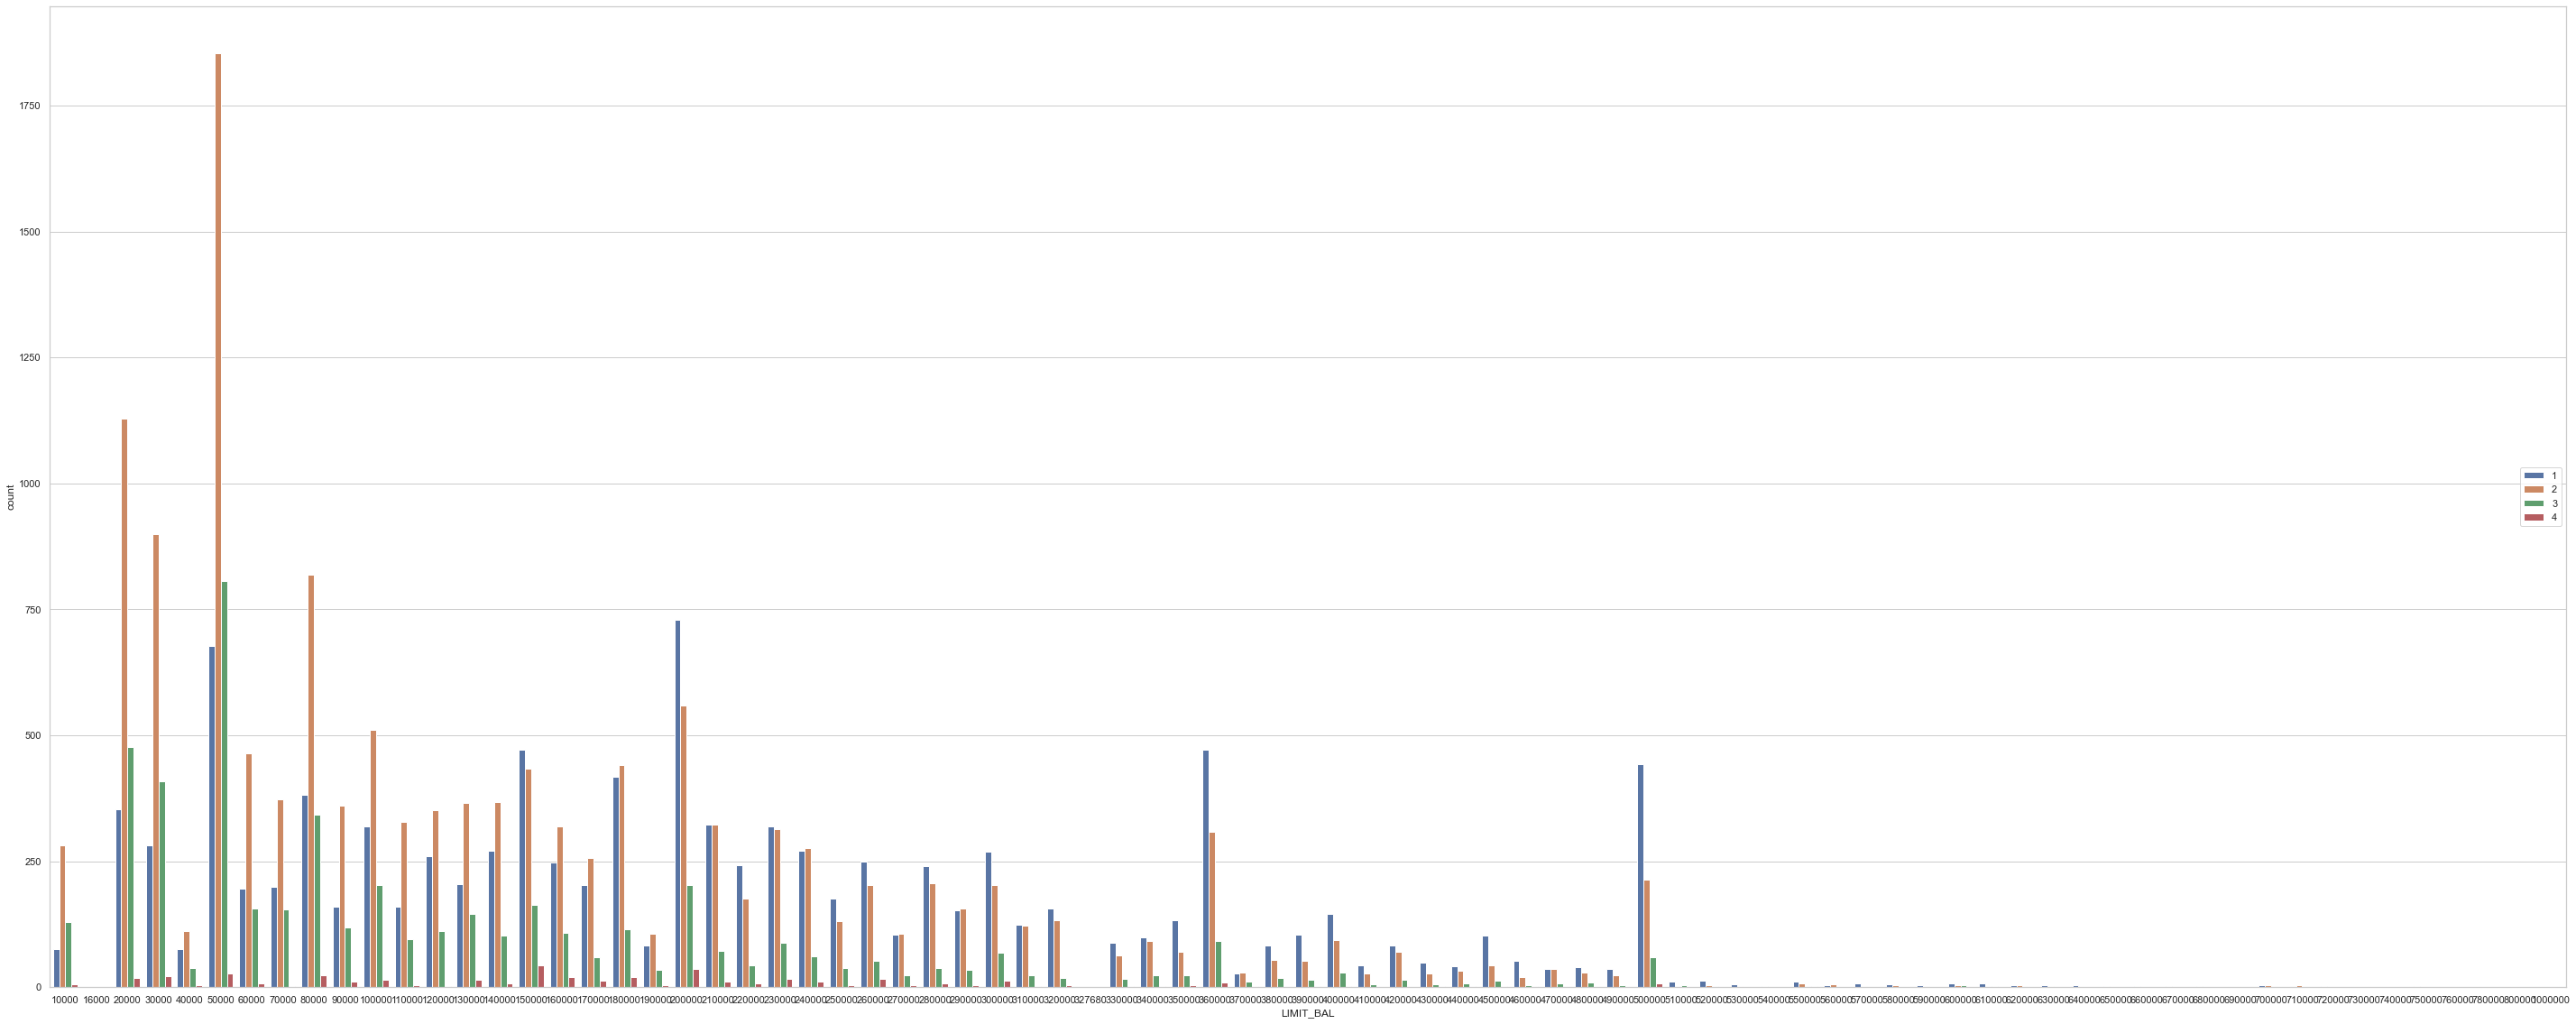

In [264]:
ca = sns.countplot(x="LIMIT_BAL", hue="EDUCATION", data=credit)
plt.gcf().set_size_inches(50,20)
plt.legend(loc='right')
plt.show()

University students make up for most of the credit loan users with limit balance ranging from 10000-140000 (a range known to have a high rate of defaulters)

- university students are the major credit loan users with a LIMIT_BAL of 50000 (known to be the account limit with the highest number of defaulters)
- Followed by university students with a LIMIT_BAL of 20000 (known to be the account limit with the second highest number of defaulters)
- Followed by university students with a LIMIT_BAL of 30000 (known to be the account limit with the third highest number of defaulters)
- Followed by university students with a LIMIT_BAL of 80000 (known to be the account limit with the fourth highest number of defaulters)

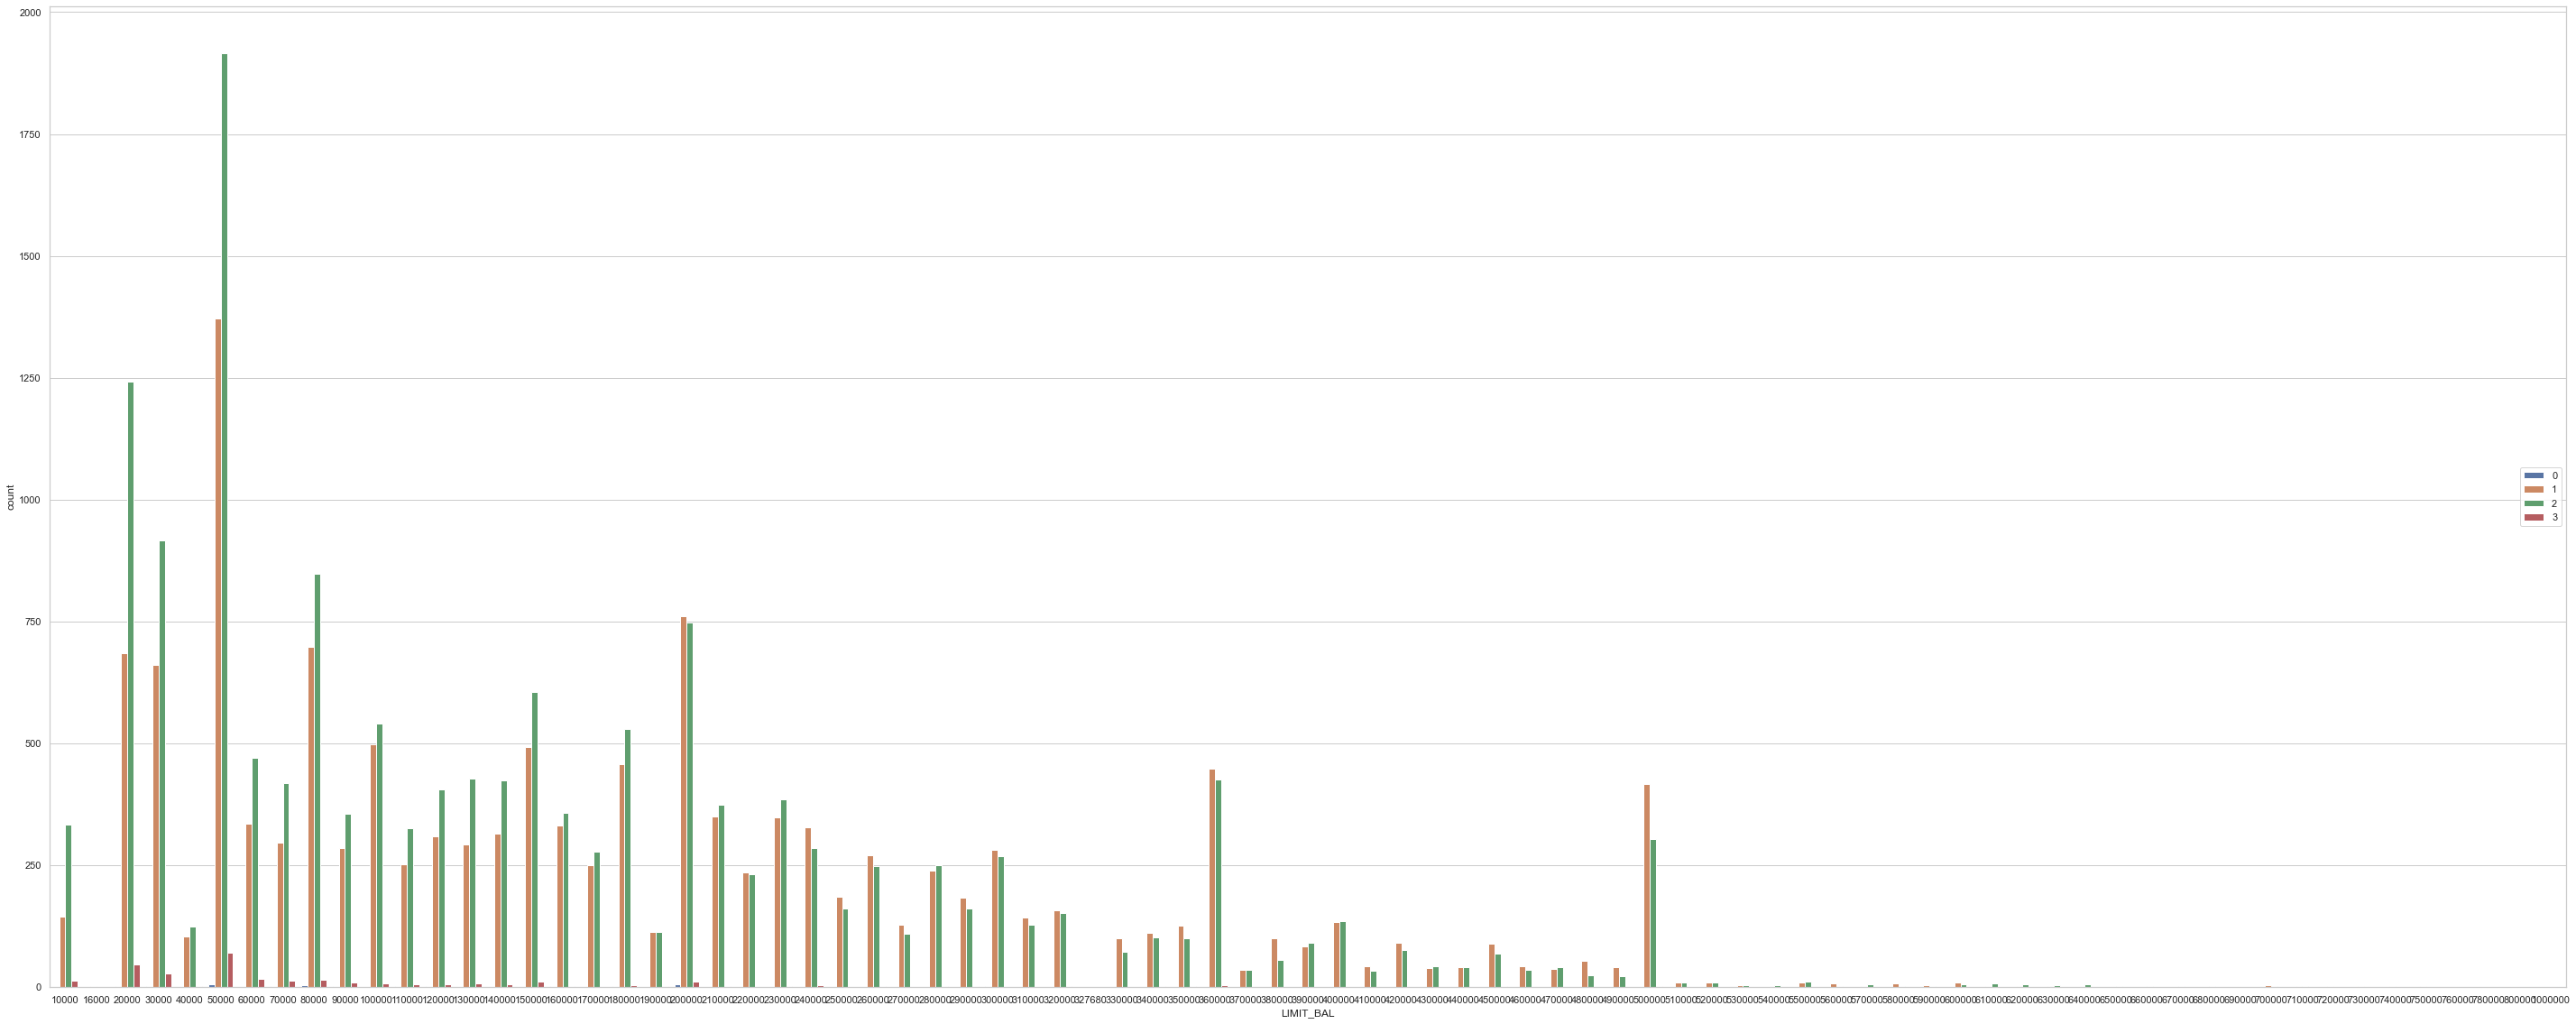

In [266]:
ca = sns.countplot(x="LIMIT_BAL", hue="MARRIAGE", data=credit)
plt.gcf().set_size_inches(50,20)
plt.legend(loc='right')
plt.show()

University students make up for most of the credit loan users with limit balance ranging from 10000-140000 (a range known to have a high rate of defaulters)

- Single people are the major credit loan users with a LIMIT_BAL of 50000 (known to be the account limit with the highest number of defaulters)
- Followed by Single people with a LIMIT_BAL of 20000 (known to be the account limit with the second highest number of defaulters)
- Followed by Single people with a LIMIT_BAL of 30000 (known to be the account limit with the third highest number of defaulters)
- Followed by Single people with a LIMIT_BAL of 80000 (known to be the account limit with the fourth highest number of defaulters)

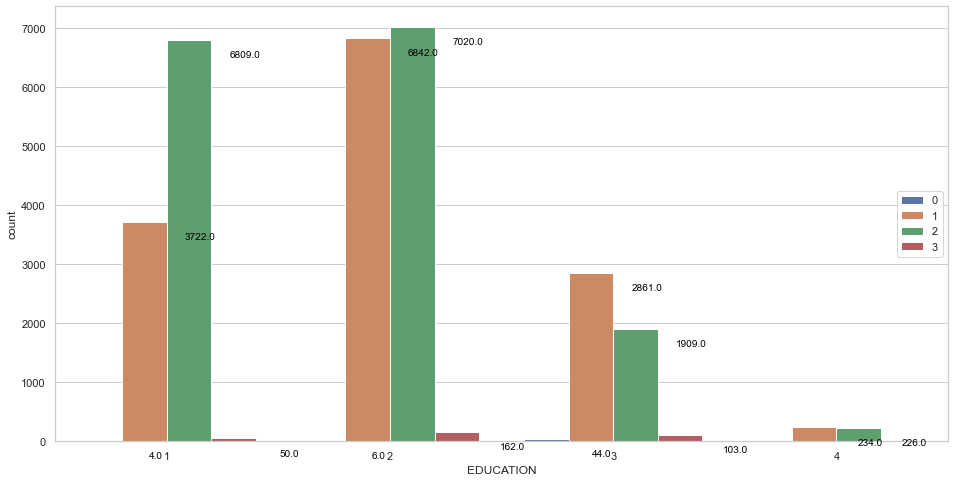

In [277]:
ca = sns.countplot(x="EDUCATION", hue="MARRIAGE", data=credit)
plt.gcf().set_size_inches(16,8)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

Most Single and married Credit loan users are graduate and university students

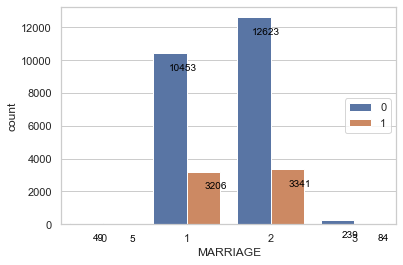

In [274]:
ca = sns.countplot(x="MARRIAGE", hue="DEFAULTERS", data=credit)
plt.legend(loc='right')
for a in ca.patches:
    ca.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

Both Married and single credit loan users default at the same rate

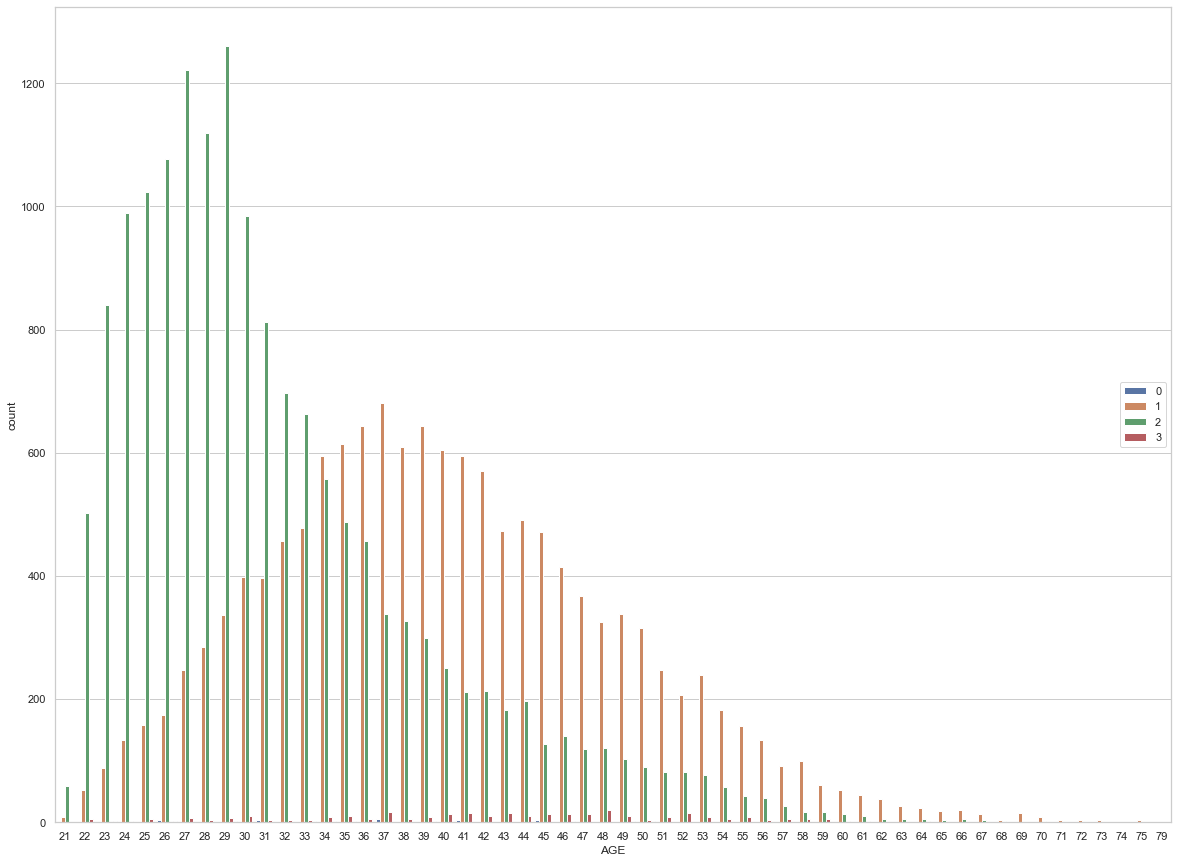

In [276]:
othersM = (credit.MARRIAGE==4)
credit.loc[othersM,'MARRIAGE']=3

ca = sns.countplot(x="AGE", hue="MARRIAGE", data=credit)
plt.gcf().set_size_inches(20,15)
plt.legend(loc='right')
plt.show()

- Most single credit loan users are of ages 21-33
- Most married credit loan users are of ages 34-56

# Profile of people likely to default in thier next payment from my analysis

From my analysis LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT4, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT6 have proven to be contributing factors in determining whether a credit loan user would default on the next payment.

A person who would likely defaults on the next payment would usually;
1. have delayed payments for at least 2 months 
2. have had their amount of bill statement increased for 2 consecutive months
3. be a single university or graduate student of age 21-33 if they meet they meet conditions 1 & 2 (especially females)
4. be a married university or graduate student of age 34-56 if they meet they meet conditions 1 & 2 (especially females)
5. be a university student with a limit balance of 20000, 30000, 50000, and 80000 (especially single people)